# חקירת דפוסי פשיעה בלוס אנג'לס
### קבוצה מס' 5 

- אורי חזן
- שיריה אליאסי
- גיל טויטו


### מקורות
Link to Kaggle: https://www.kaggle.com/datasets/haseefalam/crime-dataset/data </br>
Kaggle sources: https://catalog.data.gov/dataset/?q=&sort=metadata_created+desc&ext_location=&ext_bbox=&ext_prev_extent=-164.53125%2C-80.17871349622823%2C164.53125%2C80.17871349622823&page=2 

---

<img src="https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/project_img.jpg" alt="Project Image" >

<a id='sect0'></a>
<h2>
   תוכן עניינים:
</h2>
<ul type="1">
    <li><a href="#sect1"> הכרת הדאטה       
    </li>
    <li><a href="#sect2">חלק ראשון - ניתוח לפי גילאים
    </li>
    <li><a href="#sect3"> חלק שני - קבוצות אתניות
    </li>
    <li><a href="#sect4">חלק שלישי - ניתוח לפי איזורים
    </li>
    <li><a href="#sect5">חלק רביעי - פשעים עיקריים
    </li>
    <li><a href="#sect6">סיכום
    </li>
    
</ul>


<h1 id="sect1"> הכרת הדאטה </h1>


    
<ul>
    <li> הכרת העמודות והנתונים</li>
    <li> מפת חום/ חיפוש קורולציות</li>
    <li> סינון הדאטה</li>
    <li>ניתוחים כלליים</li>
</ul>


<h4>טעינה של הספריות</h4>

In [6]:
import pandas as pd 
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt


<h4>טעינה של הנתונים</h4>

In [8]:
#lists of paths from the github 
paths = [
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part_3.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_3.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part2_3.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_1.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_2.csv',
    'https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/part3_3.csv'
]

In [9]:
# Create an empty list to store DataFrames
dataframes = []
for path in paths:
    # Read the CSV file into a DataFrame and append it to the list
    dataframes.append(pd.read_csv(path))
   
# Concatenate all DataFrames in one step
df = pd.concat(dataframes, axis=0, ignore_index=True)  # Use ignore_index for a clean index

In [10]:
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955336,232106883,03/18/2023 12:00:00 AM,03/18/2023 12:00:00 AM,100,21,Topanga,2105,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AA,Adult Arrest,626.0,NaN,NaN,NaN,21800 ROSCOE BL,NaN,34.2239,-118.6017
955337,231112796,08/29/2023 12:00:00 AM,08/26/2023 12:00:00 AM,110,11,Northeast,1132,1,420,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),...,IC,Invest Cont,420.0,NaN,NaN,NaN,3200 ROWENA AV,NaN,34.1141,-118.2755
955338,231913572,08/31/2023 12:00:00 AM,08/31/2023 12:00:00 AM,1715,19,Mission,1985,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,8400 CEDROS AV,NaN,34.2231,-118.4536
955339,230405229,02/06/2023 12:00:00 AM,02/01/2023 12:00:00 AM,108,4,Hollenbeck,404,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,5300 VIA MARISOL,NaN,34.1044,-118.1840


In [11]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

In [12]:
df.shape

(955341, 28)

In [13]:
df.isnull().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           132327
Vict Age               0
Vict Sex          125527
Vict Descent      125534
Premis Cd             16
Premis Desc          591
Weapon Used Cd    625443
Weapon Desc       625443
Status                 0
Status Desc            0
Crm Cd 1              15
Crm Cd 2          885815
Crm Cd 3          952981
Crm Cd 4          955275
LOCATION               0
Cross Street      805033
LAT                    0
LON                    0
dtype: int64

<h2>מפת חום לקורולציות</h2>
<p>
    אחרי שראינו את הנתונים שיש בקובץ התחלנו לחפש קורלציות בין העמודות כדי להתחיל את הניתוח שלנו </br>
למרות הערכים הריקים ואלה שעוד לא עיבדנו 
</p>

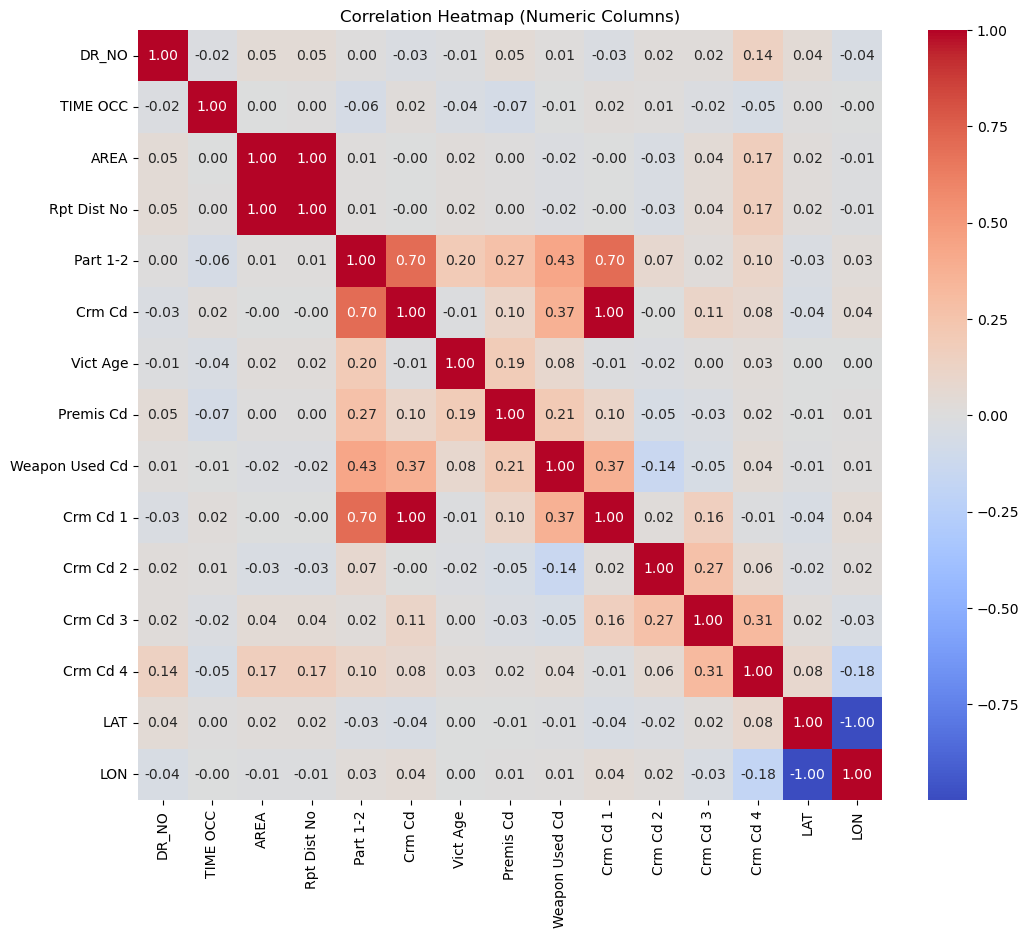

In [15]:

# Filter only numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

<h3>מסקנה לגבי השימוש במפת החום</h3>
<p>המפה מראה לנו כי אין קורלציות חזקות בין הנותונים ולכן בחרנו שלא להסתמך עליה ולחפש קשרים שונים לפי ההבנה שלנו של המידע הנתון </br>
ולכן החלטנו לחקור לעומק את העמודות ולהצליב בינהם.
</p>

<h2>ניקוי המידע </h2>
<p>
ראינו שיש לנו תאים שפוגעים ומשנים את הניתוח שלנו על הנתונים. </br>
כמו תאים חסרים או ריקים, עמודות לא רלוונטיות </br>
לדוגמה במקומות מסוימים היו לנו נתונים שגויים (כמו גיל 0)
</p>

In [18]:
#Droping the irrelevant columns   
columns_to_drop = [ 'Crm Cd 1', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Rpt Dist No', 'Part 1-2', 'Crm Cd','Premis cd','Cross Street','Weapon Used Cd','Status','Mocodes','AREA','Premis Cd','LAT','LON']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
#Filtering out missing data 
df = df[~(df['Vict Sex'].apply(lambda x: pd.isnull(x) or str(x).strip() == '') |
        df['Vict Descent'].apply(lambda x: pd.isnull(x) or str(x).strip() == ''))]
df = df[df['Vict Age'] > 0]
df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,Weapon Desc,Status Desc,LOCATION
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),NaN,Invest Cont,1000 S FLOWER ST
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,Southwest,BIKE - STOLEN,19,X,X,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,1400 W 37TH ST
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,Van Nuys,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,CLOTHING STORE,NaN,Invest Cont,14000 RIVERSIDE DR
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,NaN,Invest Cont,1900 TRANSIENT
5,231808869,04/04/2023 12:00:00 AM,12/01/2020 12:00:00 AM,2300,Southeast,THEFT OF IDENTITY,41,M,H,SINGLE FAMILY DWELLING,NaN,Invest Cont,9900 COMPTON AV
...,...,...,...,...,...,...,...,...,...,...,...,...,...
955336,232106883,03/18/2023 12:00:00 AM,03/18/2023 12:00:00 AM,100,Topanga,INTIMATE PARTNER - SIMPLE ASSAULT,49,F,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Adult Arrest,21800 ROSCOE BL
955337,231112796,08/29/2023 12:00:00 AM,08/26/2023 12:00:00 AM,110,Northeast,THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER),26,M,B,OTHER PREMISE,NaN,Invest Cont,3200 ROWENA AV
955338,231913572,08/31/2023 12:00:00 AM,08/31/2023 12:00:00 AM,1715,Mission,BATTERY - SIMPLE ASSAULT,62,F,W,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)","STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",Invest Cont,8400 CEDROS AV
955339,230405229,02/06/2023 12:00:00 AM,02/01/2023 12:00:00 AM,108,Hollenbeck,THEFT OF IDENTITY,78,F,C,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",NaN,Invest Cont,5300 VIA MARISOL


<h2>עיבוד ראשוני של הדאטה</h2>


In [20]:
Color_palette = ['#1c6cd4', 'skyblue', '#142c5c', '#a47667', '#c4b29f', '#232f3a']

In [21]:
# Convert 'Date Rptd' to datetime format
df['Date Rptd'] = pd.to_datetime(df['Date Rptd'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')


# Extract the year, month, and day into separate columns
df['Year'] = df['Date Rptd'].dt.year
df['Month'] = df['Date Rptd'].dt.month
df['Day'] = df['Date Rptd'].dt.day

In [22]:
# Extract hour from 'TIME OCC', assuming 'TIME OCC' is in 4-digit format
df['Hour'] = None  # Initialize column
df.loc[df['TIME OCC'].notna(), 'Hour'] = df.loc[df['TIME OCC'].notna(), 'TIME OCC'] // 100

# Convert 'DATE OCC' to datetime format with a specific format for consistency
df['DATE OCC'] = pd.to_datetime(df['DATE OCC'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

# Extract the day of the week
df['Day of Week'] = df['DATE OCC'].dt.day_name()


In [23]:
# Create 'Vict Age Cat' column age categories with loc 
df['Vict Age Cat'] = None  # Initialize column
df.loc[df['Vict Age'] <= 4, 'Vict Age Cat'] = 'Baby'
df.loc[(df['Vict Age'] > 4) & (df['Vict Age'] <= 12), 'Vict Age Cat'] = 'Child'
df.loc[(df['Vict Age'] > 12) & (df['Vict Age'] <= 19), 'Vict Age Cat'] = 'Teen'
df.loc[(df['Vict Age'] > 19) & (df['Vict Age'] <= 39), 'Vict Age Cat'] = 'Adult'
df.loc[(df['Vict Age'] > 39) & (df['Vict Age'] <= 59), 'Vict Age Cat'] = 'Middle'
df.loc[df['Vict Age'] > 59, 'Vict Age Cat'] = 'Senior'

<h3>חלוקת היום לזמנים כללים </h3>

In [25]:
df['Day_Part'] = 'Night'  # ברירת מחדל היא לילה
df.loc[(df['Hour'] >= 6) & (df['Hour'] < 12), 'Day_Part'] = 'Morning'   # בוקר
df.loc[(df['Hour'] >= 12) & (df['Hour'] < 18), 'Day_Part'] = 'Afternoon' # צהריים
df.loc[(df['Hour'] >= 18) & (df['Hour'] < 22), 'Day_Part'] = 'Evening'   # ערב
data = df
df[['Day_Part']]

,Day_Part
1,Evening
2,Afternoon
3,Evening
4,Afternoon
5,Night
...,...
955336,Night
955337,Night
955338,Afternoon
955339,Night


In [26]:
df.shape

(717710, 20)

<div align="center">
    <h3>ההפרש במספר השורות</h3>
    <h3> 955341-717710 = 237631</h3>
<table>
    <tr>
        <td>Original rows count </td>
        <td>After the filtering </td>
        <td>The difference</td>
    </tr>
    <tr>
        <td>955341</td>
        <td> 717710 </td>
        <td> 237631</td>
    </tr>
</table>
</div>
<h3 align="center"></br>מכאן אנחנו יכול לראות שהיו 237631 שורות לא רלוונטיות לבדיקה שלנו  </h3>

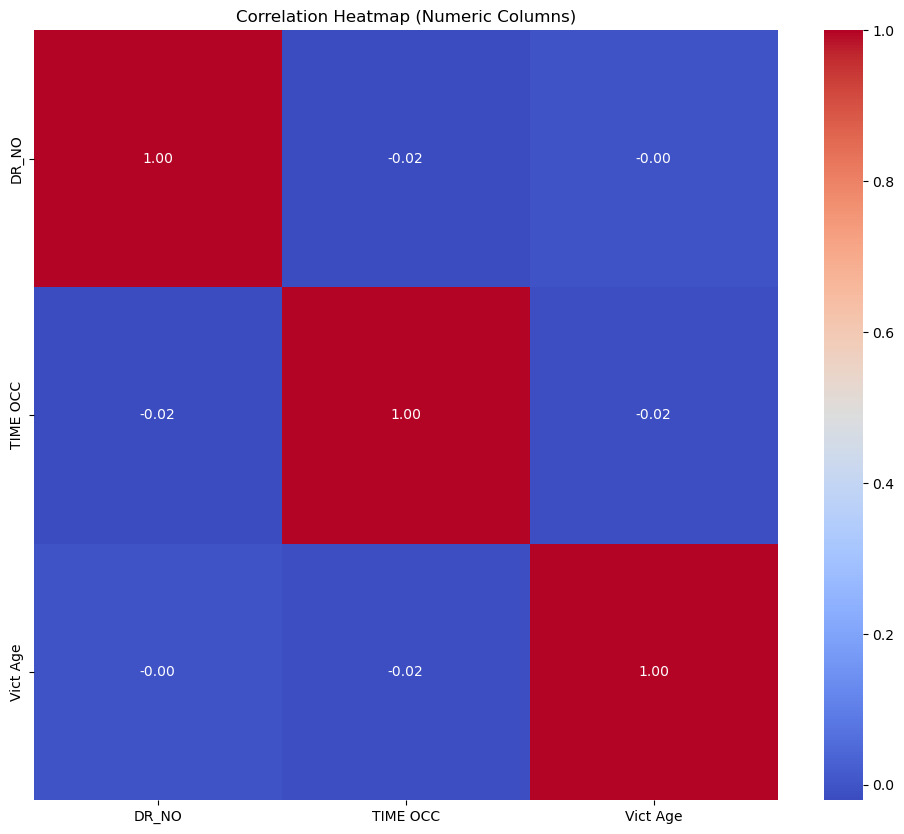

In [28]:
numeric_columns = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_columns.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap (Numeric Columns)')
plt.show()

In [29]:
df.shape

(717710, 20)

<h2>ניתוח בסיסי ראשוני</h2>
<p>
    רצינו לראות את נתוני הדאטה המסונן בצורה כללית על מנת להכיר את הדאטה, לפני שניגש לניתוח לפי מאפיינים מסויימים
    ביצענו ניתוח ראשוני כללי כדי להתחיל להתעסק עם הדאטה ולחפש רעיונות לאיזה סוגי ניתוחים אנחנו רוצים לבצע 
</p>

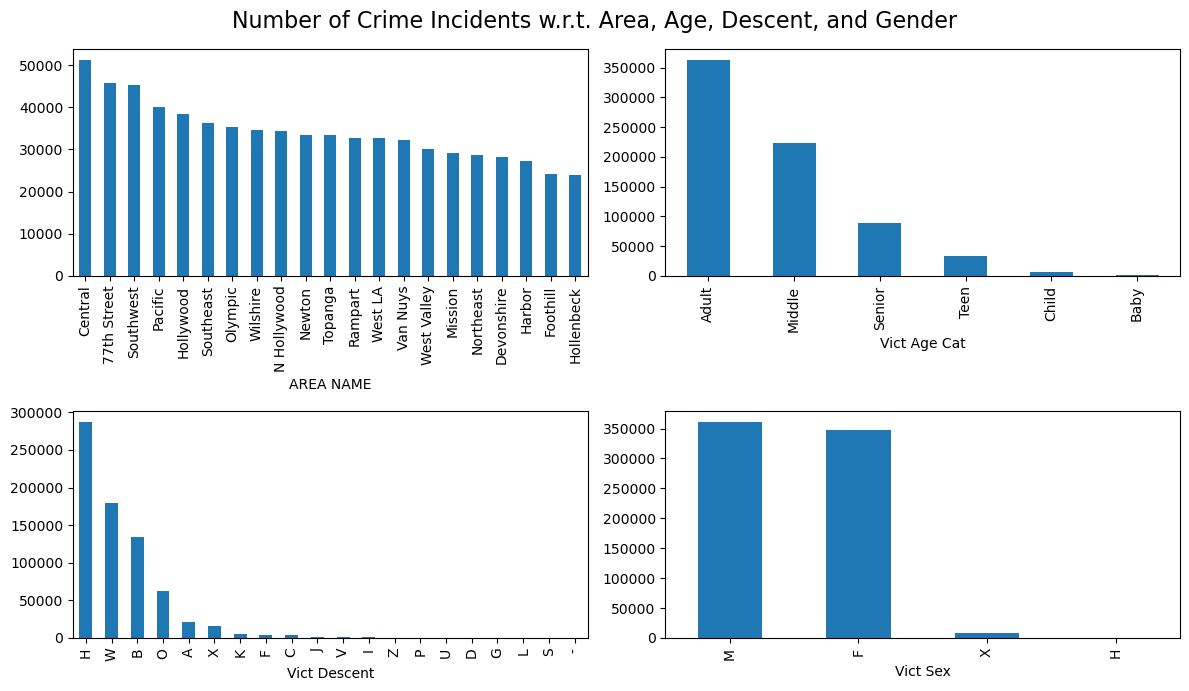

In [31]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))

df.groupby(['AREA NAME'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,0])

df[df['Vict Descent'].notnull()].groupby(['Vict Age Cat'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[0,1])

df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,0])
df.groupby(['Vict Sex'])['Day'].count().sort_values(ascending=False).plot(kind='bar', ax=axes[1,1])
fig.suptitle('Number of Crime Incidents w.r.t. Area, Age, Descent, and Gender', fontsize=16)
plt.tight_layout()

<h3> המגמה בכל שנה מ2020 עד 2024</h3>

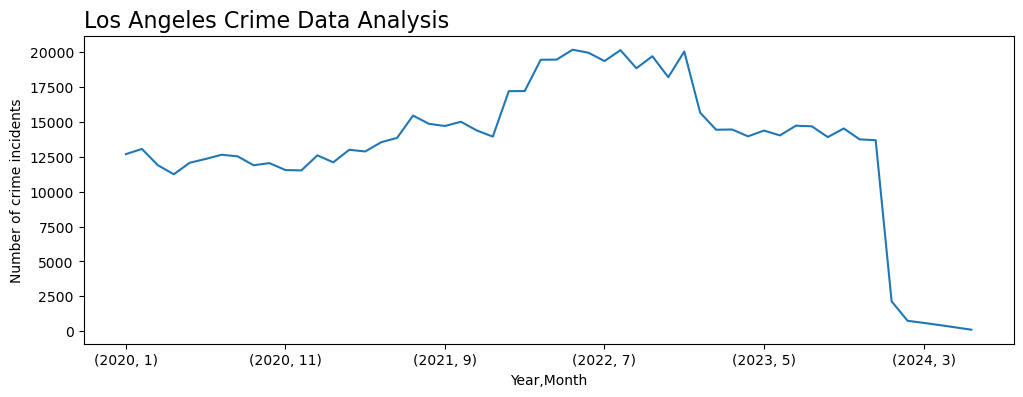

In [33]:
df.groupby(['Year', 'Month'])['Day'].count().plot(kind='line', figsize=(12, 4))
plt.ylabel('Number of crime incidents')
plt.title('Los Angeles Crime Data Analysis', loc='left', fontsize=16)
plt.show()

<p>
    ניתן לראות מגמת עליה לאורך השנים עד לקראת אמצע 2022 ומשם החלה ירידה משמעותית ברמת הפשיעה </br>
    רואים גם כי יש ירידה אף יותר משמעותית ב2024 והיא בגלל שהקובץ לא כלל בתוכו את כל השנה עדיין 
</p>

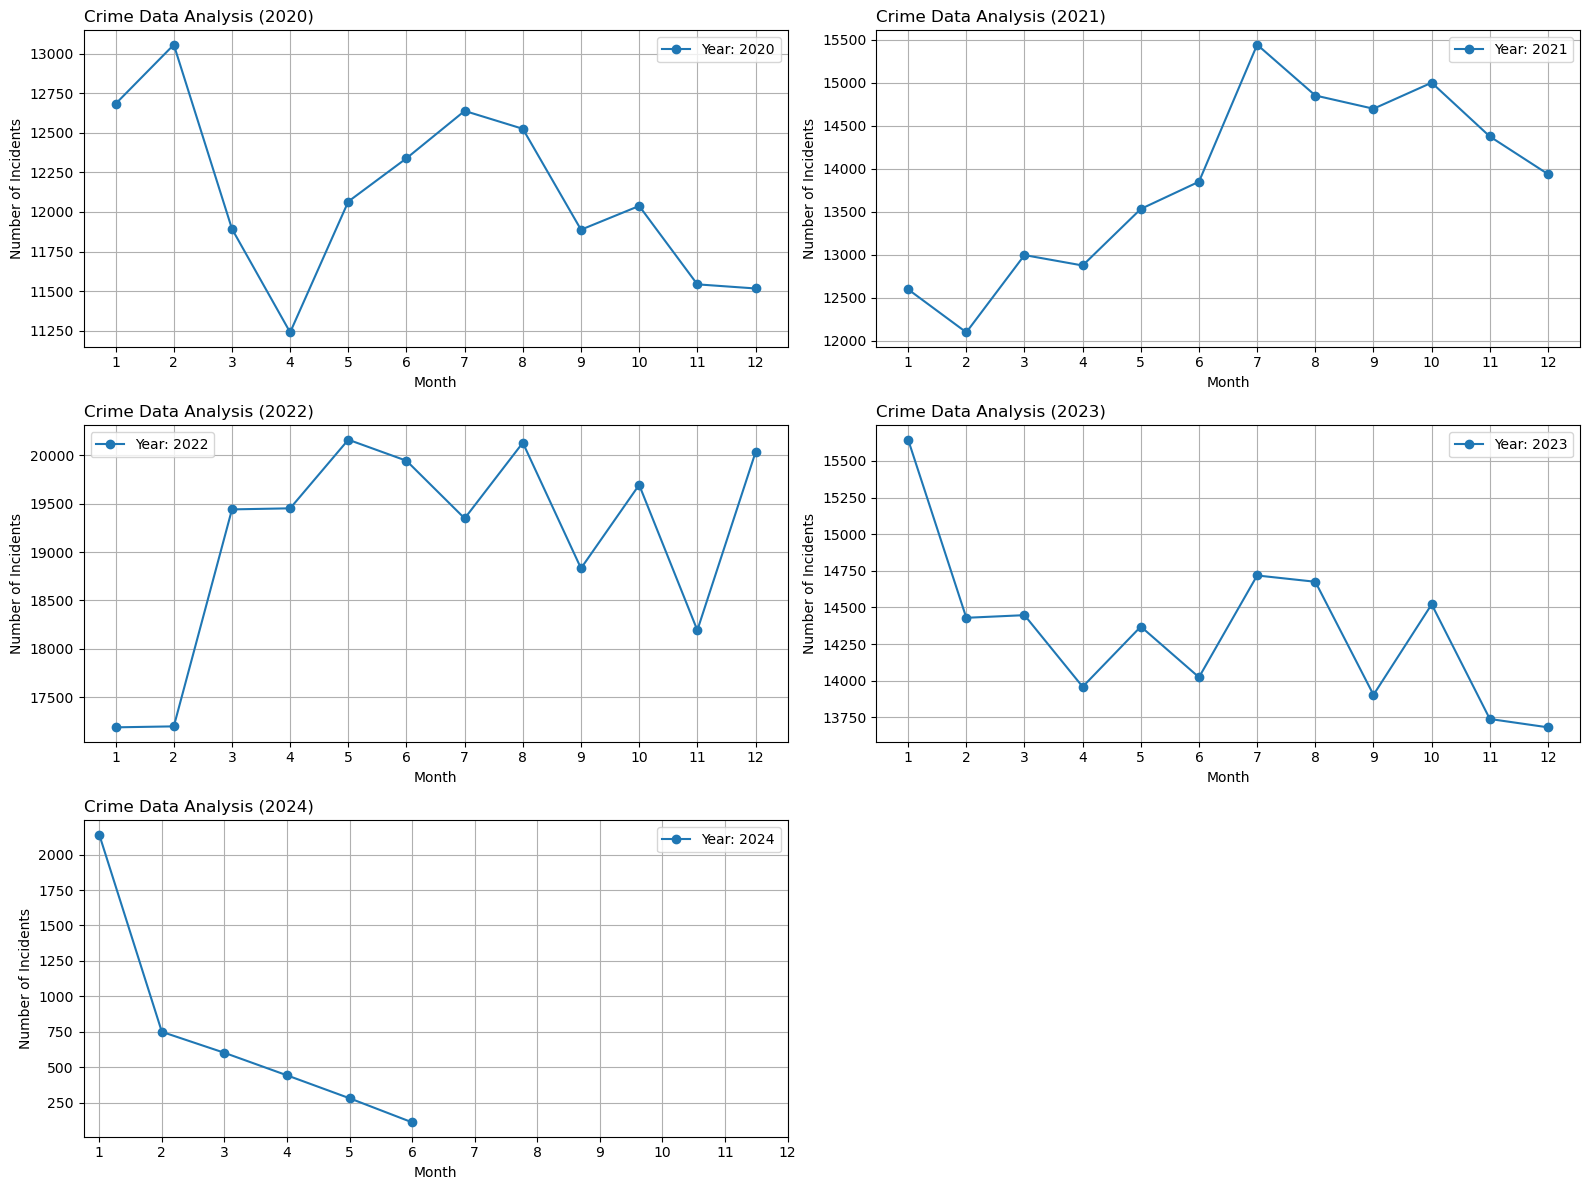

In [35]:
grouped_data = data.groupby(['Year', 'Month'])['Day'].count().reset_index()
unique_years = grouped_data['Year'].unique()
rows = (len(unique_years) + 1) // 2  # Two plots per row
fig, axes = plt.subplots(rows, 2, figsize=(16, rows * 4))
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    year_data = grouped_data[grouped_data['Year'] == year]
    ax = axes[idx]
    ax.plot(year_data['Month'], year_data['Day'], marker='o', label=f'Year: {year}')
    ax.set_title(f'Crime Data Analysis ({year})', fontsize=12, loc='left')
    ax.set_xlabel('Month')
    ax.set_ylabel('Number of Incidents')
    ax.set_xticks(range(1, 13))
    ax.grid(True)
    ax.legend()

for ax in axes[len(unique_years):]:
    ax.axis('off')
    
plt.tight_layout()
plt.show()

<p>
    ממש אפשר לראות עם הוויזואליזציה של כל שנה בנפרד שיש מגמות פשיעה שונות בכל שנה בצורה מאוד ברורה לעומת הגרף הקודם 
</p>

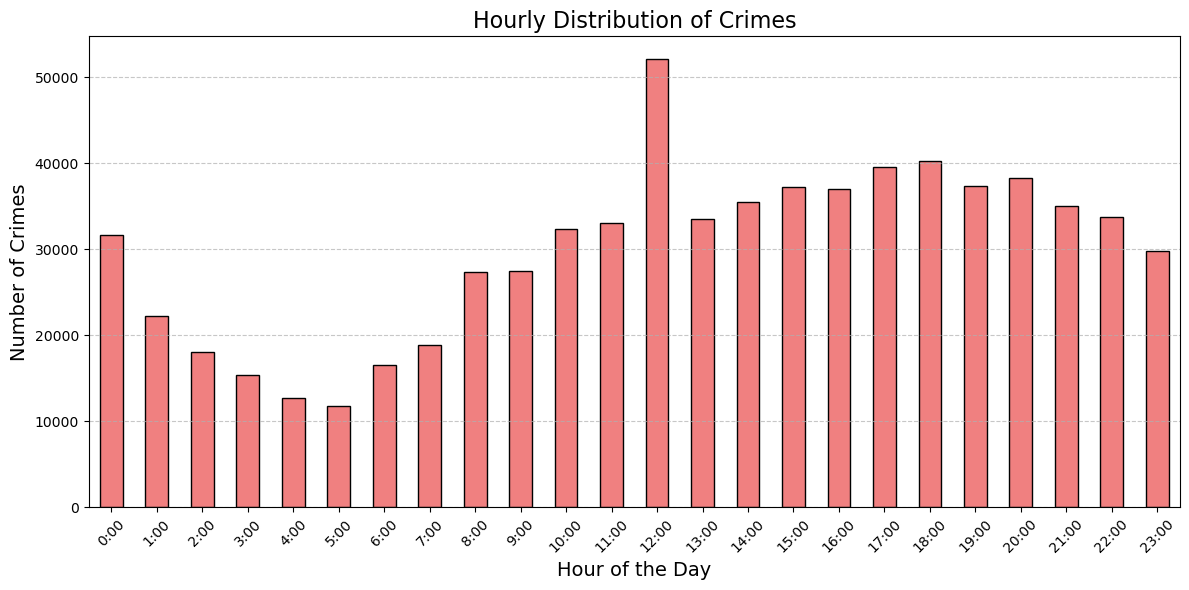

In [37]:
hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_counts.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Hourly Distribution of Crimes', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(ticks=range(24), labels=[f'{h}:00' for h in range(24)], rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

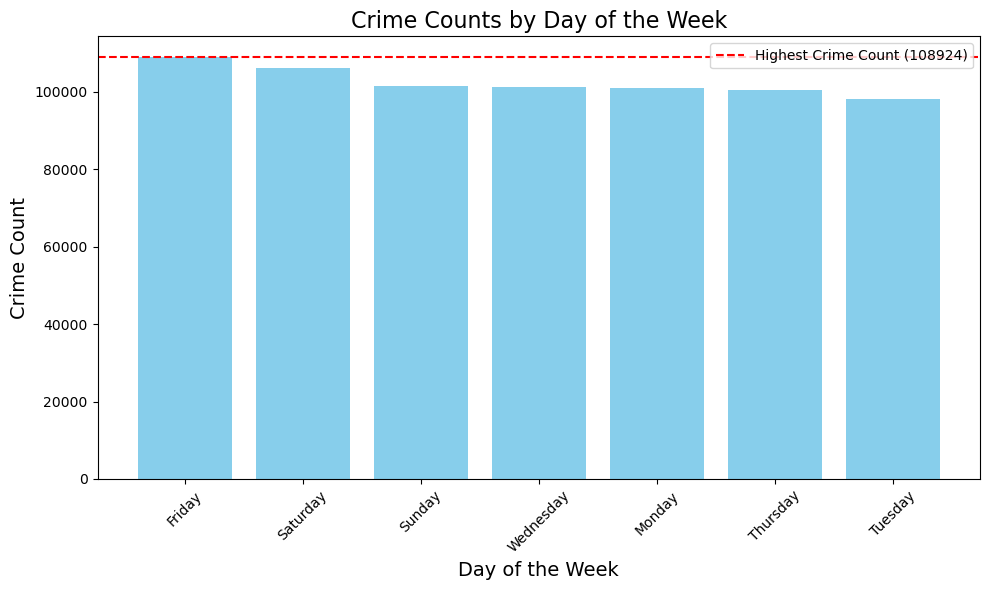

108924

In [38]:
day_of_week_counts = df['Day of Week'].value_counts().reset_index()
day_of_week_counts.columns = ['Day of Week', 'Crime Count']
max_crime_count = day_of_week_counts['Crime Count'].max()
plt.figure(figsize=(10, 6))
plt.bar(day_of_week_counts['Day of Week'], day_of_week_counts['Crime Count'], color='skyblue')
plt.title('Crime Counts by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Crime Count', fontsize=14)
plt.xticks(rotation=45)


# Add a horizontal red line at the maximum crime count
plt.axhline(y=max_crime_count, color='red', linestyle='--', label=f"Highest Crime Count ({max_crime_count})")
plt.legend()
plt.tight_layout()
plt.show()

max_crime_count

<h3>מתי מתרחשים יותר פשעים ביום או בלילה</h3>

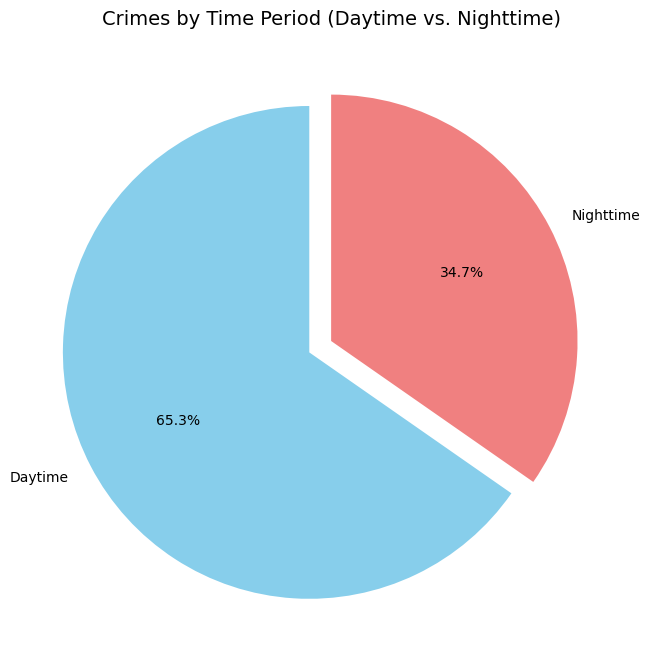

In [40]:
data['Time Period'] = df['Hour'].apply(lambda x: 'Daytime' if 6 <= x <= 19 else 'Nighttime')
time_period_counts = data['Time Period'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    time_period_counts,
    labels=time_period_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightcoral'],
    explode=(0.1, 0),  )
plt.title('Crimes by Time Period (Daytime vs. Nighttime)', fontsize=14)
plt.show()

<h2>מפוי של סוגי של קטגוריות פשיעה</h2>

<p>
    רצינו לבדוק איזה סוג נפוץ יותר לקבוצת גיל מסוימת ולכן התחלנו במיפוי של סוגי פשיעה </br>
    עישנו מיפוי של סוגי הפשעים מכוון שהיו יותר מידי פירוט על סוגי פשעים מה שהפריעה לנו על העבודה. </br>
    בעזרת המיפוי צמצמנו את הפירוט הנרחב של סוגי הפשעים לסוגים כללים יותר </br>
    לדוגמה: גניבה, שוד , שוד מעל 950 דולר - כינסנו לשוד או גניבה 
</p>

In [43]:
df['Crm Cd Desc'].value_counts().sort_values()

Crm Cd Desc
INCITING A RIOT                                       1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
LYNCHING - ATTEMPTED                                  1
GRAND THEFT / AUTO REPAIR                             2
LYNCHING                                              2
                                                  ...  
INTIMATE PARTNER - SIMPLE ASSAULT                 46884
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    52142
BURGLARY FROM VEHICLE                             56801
THEFT OF IDENTITY                                 61410
BATTERY - SIMPLE ASSAULT                          74809
Name: count, Length: 136, dtype: int64

In [44]:
df['Crm Cd Desc'].unique()

array(['BURGLARY FROM VEHICLE', 'BIKE - STOLEN',
       'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)', 'THEFT OF IDENTITY',
       'BATTERY - SIMPLE ASSAULT',
       'SODOMY/SEXUAL CONTACT B/W PENIS OF ONE PERS TO ANUS OTH',
       'CRM AGNST CHLD (13 OR UNDER) (14-15 & SUSP 10 YRS OLDER)',
       'SEX,UNLAWFUL(INC MUTUAL CONSENT, PENETRATION W/ FRGN OBJ',
       'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT',
       'LETTERS, LEWD  -  TELEPHONE CALLS, LEWD',
       'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD',
       'CRIMINAL THREATS - NO WEAPON DISPLAYED',
       'CHILD ANNOYING (17YRS & UNDER)', 'CONTEMPT OF COURT',
       'THEFT PLAIN - PETTY ($950 & UNDER)',
       'INTIMATE PARTNER - SIMPLE ASSAULT', 'LEWD CONDUCT',
       'THEFT PLAIN - ATTEMPT', 'BURGLARY',
       'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)', 'ROBBERY',
       'BUNCO, GRAND THEFT', 'BATTERY WITH SEXUAL CONTACT',
       'INTIMATE PARTNER - AGGRAVATED ASSAULT', 'ORAL COPULATION',
       'UN

In [45]:

len(df['Crm Cd Desc'].unique())

136

In [46]:
df['Crm Cd Desc'].value_counts()

Crm Cd Desc
BATTERY - SIMPLE ASSAULT                          74809
THEFT OF IDENTITY                                 61410
BURGLARY FROM VEHICLE                             56801
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT    52142
INTIMATE PARTNER - SIMPLE ASSAULT                 46884
                                                  ...  
FIREARMS RESTRAINING ORDER (FIREARMS RO)              2
LYNCHING                                              2
LYNCHING - ATTEMPTED                                  1
DISHONEST EMPLOYEE ATTEMPTED THEFT                    1
INCITING A RIOT                                       1
Name: count, Length: 136, dtype: int64

In [47]:
crime_mapping = {
    # Theft and Burglary
    'BURGLARY': 'Theft and Burglary',
    'THEFT OF IDENTITY': 'Theft and Burglary',
    'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft and Burglary',
    'BURGLARY FROM VEHICLE': 'Theft and Burglary',
    'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft and Burglary',
    'VEHICLE - STOLEN': 'Theft and Burglary',
    'PICKPOCKET': 'Theft and Burglary',
    'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft and Burglary',
    'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft and Burglary',

'BURGLARY FROM VEHICLE': 'Theft and Burglary',
 'BIKE - STOLEN': 'Theft and Burglary',
 'SHOPLIFTING-GRAND THEFT ($950.01 & OVER)': 'Theft and Burglary',
 'THEFT OF IDENTITY': 'Theft and Burglary',
 'THEFT PLAIN - PETTY ($950 & UNDER)': 'Theft and Burglary',
 'SHOPLIFTING - PETTY THEFT ($950 & UNDER)': 'Theft and Burglary',
 'THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND OVER)': 'Theft and Burglary',
 'THEFT FROM MOTOR VEHICLE - PETTY ($950 & UNDER)': 'Theft and Burglary',
 'BURGLARY': 'Theft and Burglary',
 'BURGLARY, ATTEMPTED': 'Theft and Burglary',
 'BURGLARY FROM VEHICLE, ATTEMPTED': 'Theft and Burglary',
 'THEFT, PERSON': 'Theft and Burglary',
 'THEFT FROM PERSON - ATTEMPT': 'Theft and Burglary',
 'VEHICLE, STOLEN - OTHER (MOTORIZED SCOOTERS, BIKES, ETC)': 'Theft and Burglary',
 'PURSE SNATCHING': 'Theft and Burglary',
 'THEFT FROM MOTOR VEHICLE - ATTEMPT': 'Theft and Burglary',
 'VEHICLE - ATTEMPT STOLEN': 'Theft and Burglary',
 'VEHICLE - STOLEN': 'Theft and Burglary',
 'EMBEZZLEMENT, GRAND THEFT ($950.01 & OVER)': 'Theft and Burglary',
 'EMBEZZLEMENT, PETTY THEFT ($950 & UNDER)': 'Theft and Burglary',
 'SHOPLIFTING - ATTEMPT': 'Theft and Burglary',
 'TILL TAP - PETTY ($950 & UNDER)': 'Theft and Burglary',
 'TILL TAP - GRAND THEFT ($950.01 & OVER)': 'Theft and Burglary',
    
    # Assault and Battery
    'INTIMATE PARTNER - AGGRAVATED ASSAULT': 'Assault/Battery',
    'BATTERY - SIMPLE ASSAULT': 'Assault/Battery',
    'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT': 'Assault/Battery',
    'BATTERY ON A FIREFIGHTER': 'Assault/Battery',
    'ASSAULT WITH DEADLY WEAPON ON POLICE OFFICER': 'Assault/Battery',
    'BATTERY POLICE (SIMPLE)': 'Assault/Battery',

    # Robbery
    'ROBBERY': 'Robbery',
    'ATTEMPTED ROBBERY': 'Robbery',
    'PURSE SNATCHING': 'Robbery',
    'PURSE SNATCHING - ATTEMPT': 'Robbery',
    'CARJACKING': 'Robbery',

    # Sexual Offenses
    'RAPE, FORCIBLE': 'Sexual Offenses',
    'INDECENT EXPOSURE': 'Sexual Offenses',
    'SEXUAL PENETRATION W/FOREIGN OBJECT': 'Sexual Offenses',
    'LEWD/LASCIVIOUS ACTS WITH CHILD': 'Sexual Offenses',
    'SEX OFFENDER REGISTRANT OUT OF COMPLIANCE': 'Sexual Offenses',
    'ORAL COPULATION': 'Sexual Offenses',

    # Drug Offenses
    'HUMAN TRAFFICKING - COMMERCIAL SEX ACTS': 'Drug Offenses',
    'SALE OF CONTROLLED SUBSTANCE': 'Drug Offenses',
    'NARCOTICS POSSESSION': 'Drug Offenses',

    # Public Order
    'DISTURBING THE PEACE': 'Public Order',
    'TRESPASSING': 'Public Order',
    'FAILURE TO DISPERSE': 'Public Order',
    'DISRUPT SCHOOL': 'Public Order',

    # Property Damage
    'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)': 'Property Damage',
    'ARSON': 'Property Damage',
    'GRAFFITI': 'Property Damage',
    'VANDALISM - MISDEAMEANOR ($399 OR UNDER)': 'Property Damage',

    # Fraud and Identity Theft
    'CREDIT CARDS, FRAUD USE ($950.01 & OVER)': 'Fraud/Identity Theft',
    'EMBEZZLEMENT': 'Fraud/Identity Theft',
    'THEFT OF IDENTITY': 'Fraud/Identity Theft',

    # Homicide
    'CRIMINAL HOMICIDE': 'Homicide',
    'ATTEMPTED MURDER': 'Homicide'
}

# Apply the mapping to create a new column 'Crime Category'
df['Crime Category'] = df['Crm Cd Desc'].map(crime_mapping).fillna('Other')

# Display the first few rows to confirm the new column
df['Crime Category'].unique()


array(['Theft and Burglary', 'Fraud/Identity Theft', 'Assault/Battery',
       'Other', 'Robbery', 'Sexual Offenses', 'Property Damage',
       'Public Order', 'Drug Offenses', 'Homicide'], dtype=object)

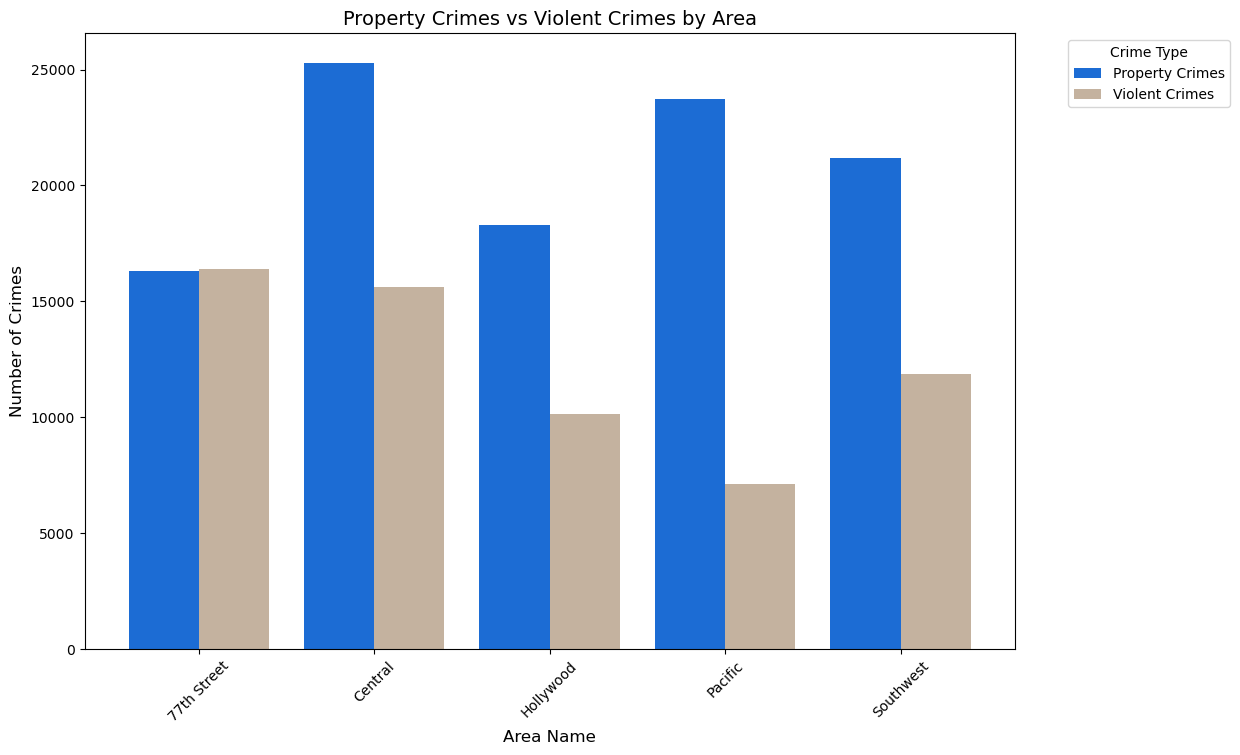

In [48]:
# סינון לפי סוגי פשעים
property_crimes = df[df['Crime Category'].isin(['Theft and Burglary', 'Fraud/Identity Theft', 'Property Damage', 'Theft/Burglary'])]
violent_crimes = df[df['Crime Category'].isin(['Assault/Battery', 'Robbery', 'Sexual Offenses', 'Homicide'])]

# סינון רק ל-5 האזורים העיקריים
top_areas = df['AREA NAME'].value_counts().head(5).index
property_crimes_top = property_crimes[property_crimes['AREA NAME'].isin(top_areas)]
violent_crimes_top = violent_crimes[violent_crimes['AREA NAME'].isin(top_areas)]

# יצירת טבלה מקובצת שתציג את מספר הפשעים באזורים עבור כל סוג פשע
property_crimes_counts = property_crimes_top.groupby('AREA NAME').size()
violent_crimes_counts = violent_crimes_top.groupby('AREA NAME').size()

# חיבור הנתונים לפלט אחד
crime_comparison_df = pd.DataFrame({
    'Property Crimes': property_crimes_counts,
    'Violent Crimes': violent_crimes_counts
}).fillna(0)  # מילוי ערכים חסרים ב-0 אם יש אזור ללא סוג פשע

# יצירת גרף עמודות להשוואה בין פשעי רכוש ואלימות באזורים
crime_comparison_df.plot(kind='bar', figsize=(12, 8), stacked=False, width=0.8, color = [Color_palette[0],Color_palette[4]])

# כותרות
plt.title('Property Crimes vs Violent Crimes by Area', fontsize=14)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)

# הצגת הגרף
plt.xticks(rotation=45)
plt.legend(title='Crime Type', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<h1 id="sect2"> חלק ראשון - ניתוח לפי גילאים</h1>

<h2> גרף פשעים וקבוצות גיל</h2>

In [51]:
crime_age_analysis = df.groupby(['Vict Age Cat', 'Crime Category']).size().unstack(fill_value=0)
crime_age_analysis = crime_age_analysis.loc[:, crime_age_analysis.sum().sort_values(ascending=False).index]


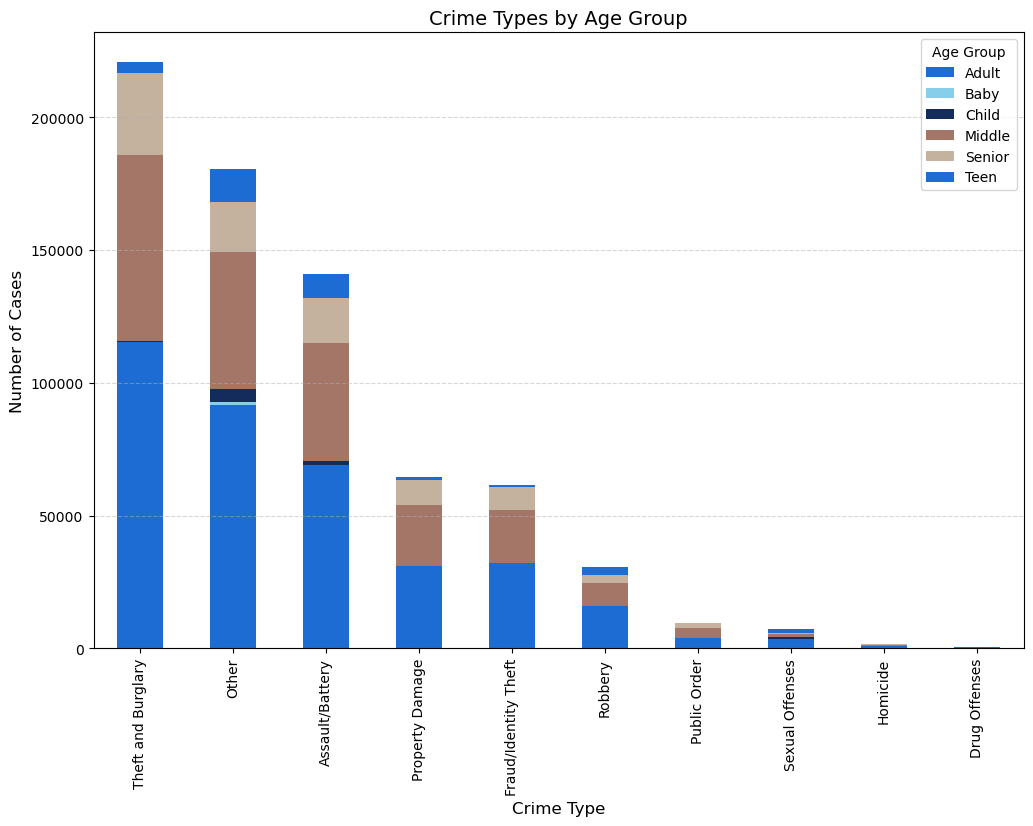

In [52]:
crime_age_analysis.T.plot(kind='bar', figsize=(12, 8), stacked=True , color = Color_palette[:-1])
plt.title('Crime Types by Age Group', fontsize=14)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.legend(title='Age Group', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

<p>
    ניתן לראות כי סכום הפשעים שלא הצלחנו לקטלג במיפוי של הדאטה מצטבר לכמות מאוד גדולה 
</p>

<h2>גרף דמוגרפי לפי גילאים איזה מין נפגע יותר </h2>


Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

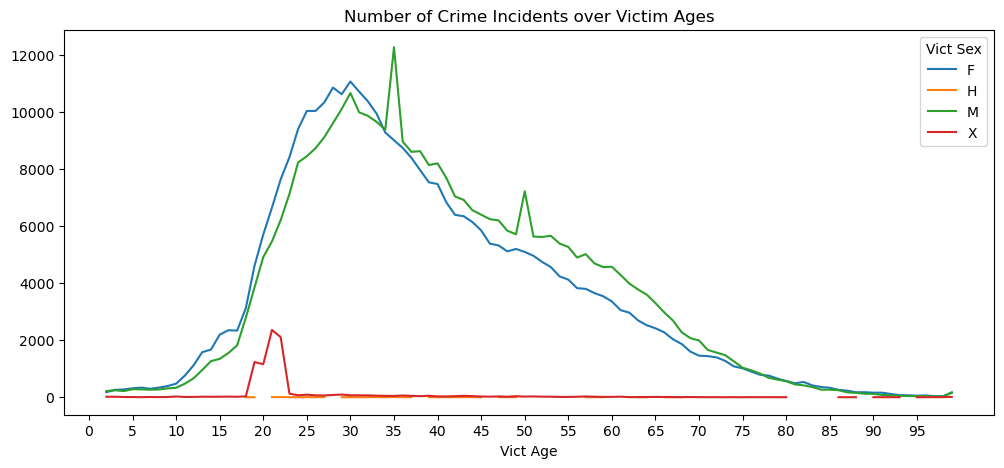

In [55]:
data = df[(df['Vict Age']>0)]
plt_data = data.groupby(['Vict Age', 'Vict Sex'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

<p>
    ההצגה הקווית לפי שנים אומנם מראה בצורה טובה כי יש טווח גילאים שנפגע יותר אבל לא ברור פה מי נפגע יותר אם נשים או גברים ובאיזה קבוצת גיל
</p>

<h3>
    אילו קבוצות גיל נפגעות יותר ומאיזה מין 
</h3>

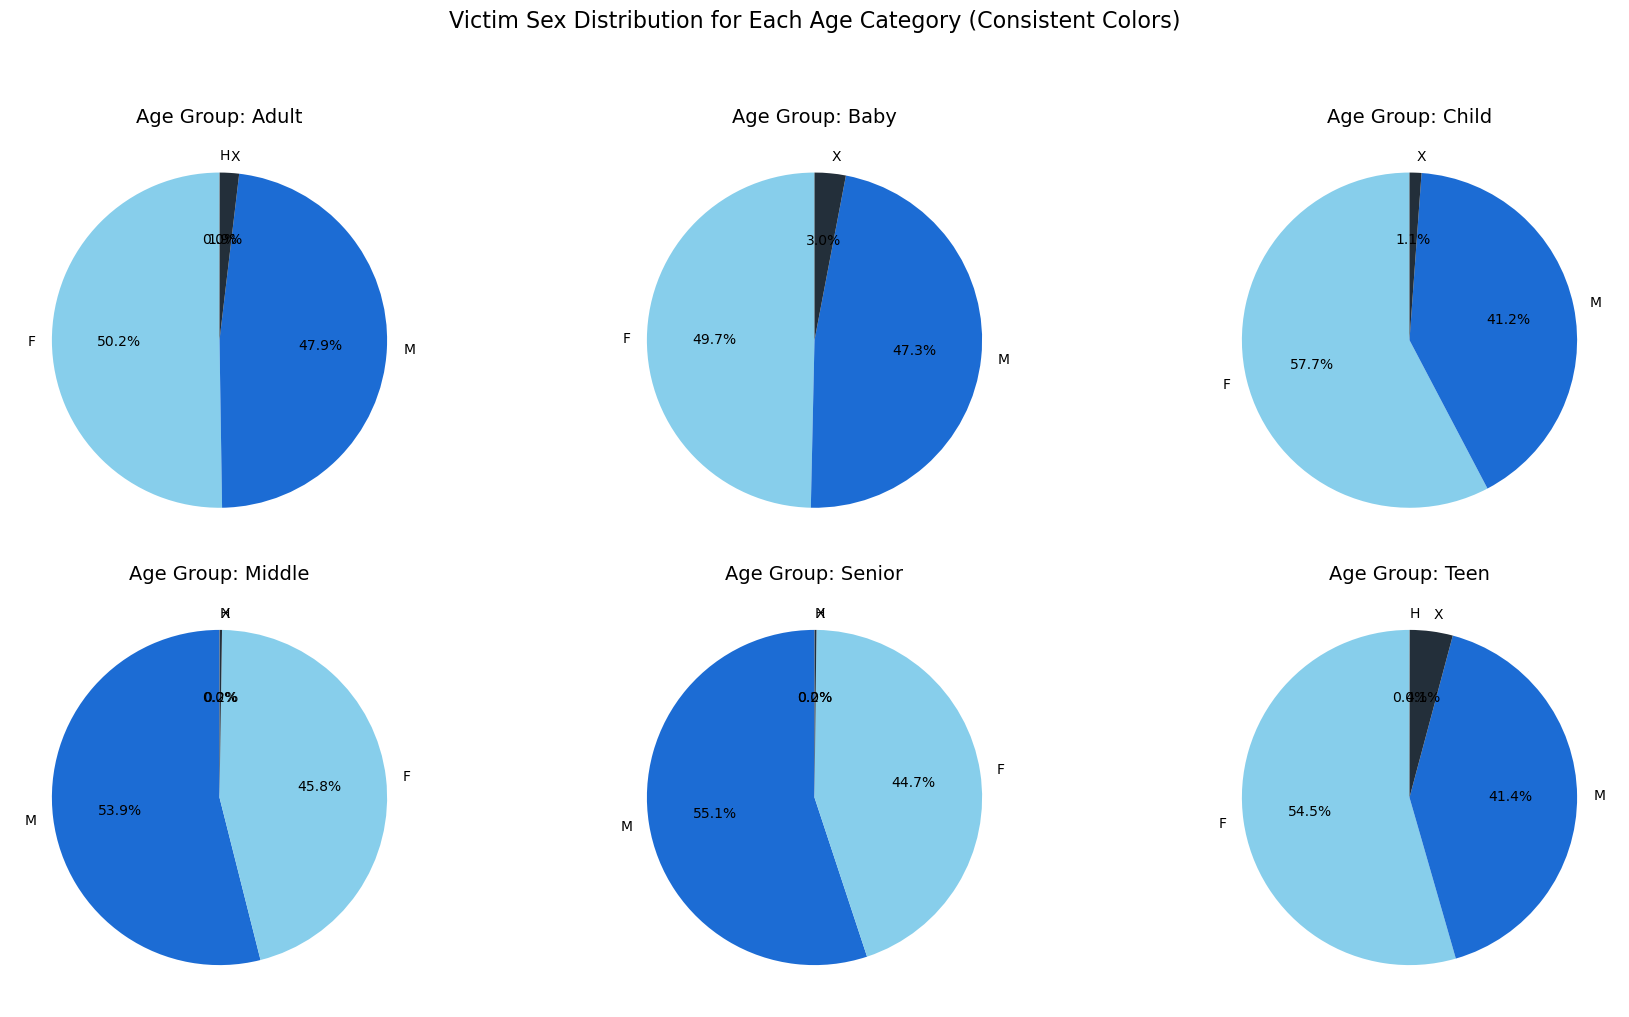

In [58]:
plt_data = data.groupby(['Vict Age Cat', 'Vict Sex'])['Day'].count().reset_index(name='Count')
plt_data = plt_data.sort_values(by=['Vict Age Cat', 'Count'], ascending=[True, False])

unique_sexes = plt_data['Vict Sex'].unique()
color_mapping = {
    'M': '#1c6cd4',
    'F': 'skyblue',
    'X': '#232f3a',  
    'H': 'gray',
}
age_categories = plt_data['Vict Age Cat'].unique()
rows, cols = (len(age_categories) // 3) + 1, 3 
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()  
for idx, age_cat in enumerate(age_categories):
    subset = plt_data[plt_data['Vict Age Cat'] == age_cat]
    

    colors = [color_mapping[sex] for sex in subset['Vict Sex']]
    axes[idx].pie(
        subset['Count'],
        labels=subset['Vict Sex'],
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
    )
    axes[idx].set_title(f'Age Group: {age_cat}', fontsize=14)

# Remove unused subplots
for i in range(len(age_categories), len(axes)):
    fig.delaxes(axes[i])
    
plt.suptitle('Victim Sex Distribution for Each Age Category (Consistent Colors)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

<h2>פילוח הקבוצות הנפגעות על פי חלקי היום</h2>

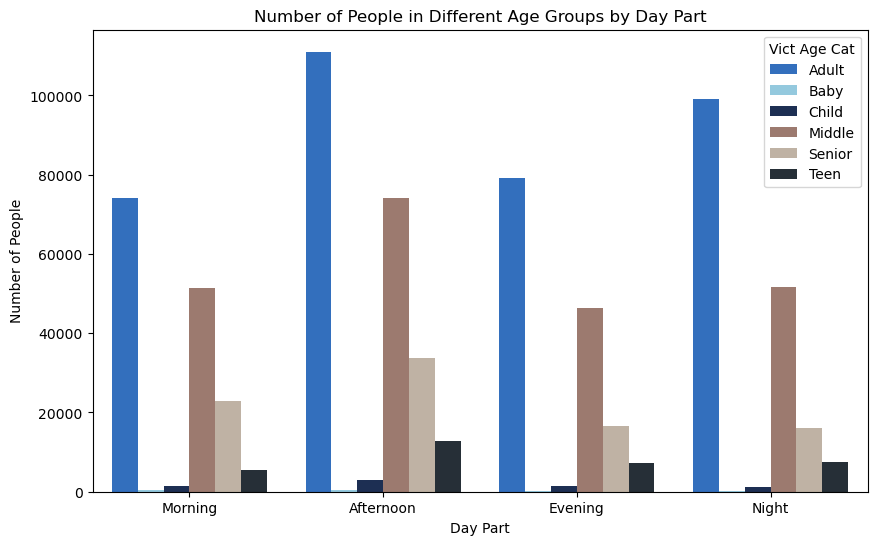

In [60]:
count_df = df.groupby(['Day_Part', 'Vict Age Cat'], observed=False).size().reset_index(name='Count')
# יצירת גרף עמודות עם סדר מותאם לחלקי היום
plt.figure(figsize=(10, 6))
sns.barplot(x='Day_Part', y='Count', hue='Vict Age Cat', data=count_df, 
            order=['Morning', 'Afternoon', 'Evening', 'Night'], palette=Color_palette)  # סדר הרצוי

plt.title("Number of People in Different Age Groups by Day Part")
plt.xlabel("Day Part")
plt.ylabel("Number of People")
plt.show()

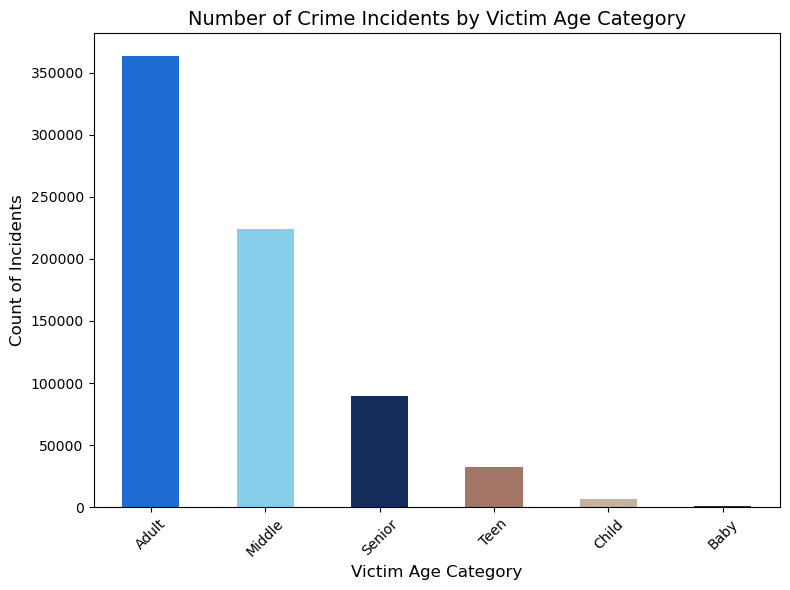

In [61]:
df[df['Vict Descent'].notnull()].groupby(['Vict Age Cat'])['Day'].count().sort_values(ascending=False).plot(kind='bar', color= Color_palette, figsize=(8, 6))
plt.title('Number of Crime Incidents by Victim Age Category', fontsize=14)
plt.xlabel('Victim Age Category', fontsize=12)
plt.ylabel('Count of Incidents', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


<p>
 
<b>מסקנה כללית:</b>


פשעי גניבה ופריצה נפוצים ביותר בקרב כל קבוצות הגיל, כאשר קבוצת המבוגרים (19-39) היא הקבוצה הנפגעת ביותר, והנשים נפגעות יותר מכל קבוצות הגיל. בשני קבוצות הגיל של זקנים וגיל העמידה, הגברים הם הנפגעים העיקריים.
</p>

<h1 id="sect3"> חלק שני - קבוצות אתניות</h1>

<h2>בחרנו לעסוק בארבעת הקבוצות הנפגעות העיקריות לפי הניתוח הראשוני בארבעת הגרפים. </br>
בדאטה הקבוצות האתניות מתוארות באות, ולכן בחרנו להוסיף תמונה עם פירוט על האותיות לפי הקבוצות האתניות</h2>

<div align="center">
    <img src="https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/Racist_Table.jpg">
</div>

In [66]:
#  מסנן לפי מוצא ומכנס את כל מה שהא לא מ3 הקבוצות הגדולות ל אחר
df['Vict Descent'] = df['Vict Descent'].apply(lambda x: x if x in ['W', 'B', 'H'] else 'O')

<h2>  הקבוצות האתניות הנפגעות על פי גילאים </h2>

Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

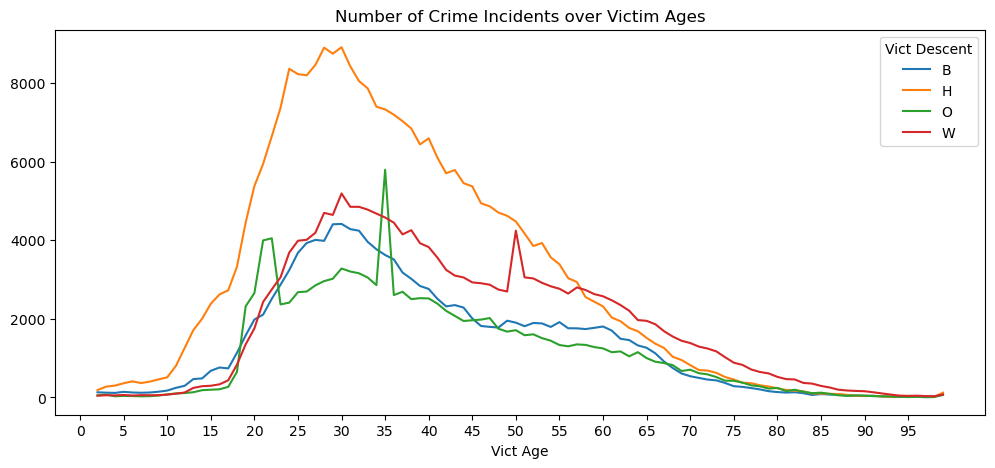

In [68]:
top5descents = df.groupby(['Vict Descent'])['Day'].count().sort_values(ascending=False).index[:4]
data = df[(df['Vict Age']>0) & (df['Vict Descent'].isin(top5descents))].copy()
vddict = {'B':'B', 'H':'H', 'O':'O', 'W':'W'}
data['Vict Descent'] = data['Vict Descent'].apply(lambda x: vddict[x])
plt_data = data.groupby(['Vict Age', 'Vict Descent'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

<p>
    ניתן לראות את ההתפלגות בטווחי הגילאים של כל קבוצה אתנית 
</p>

<h2>דמוגרפי גברים נשים</h2>

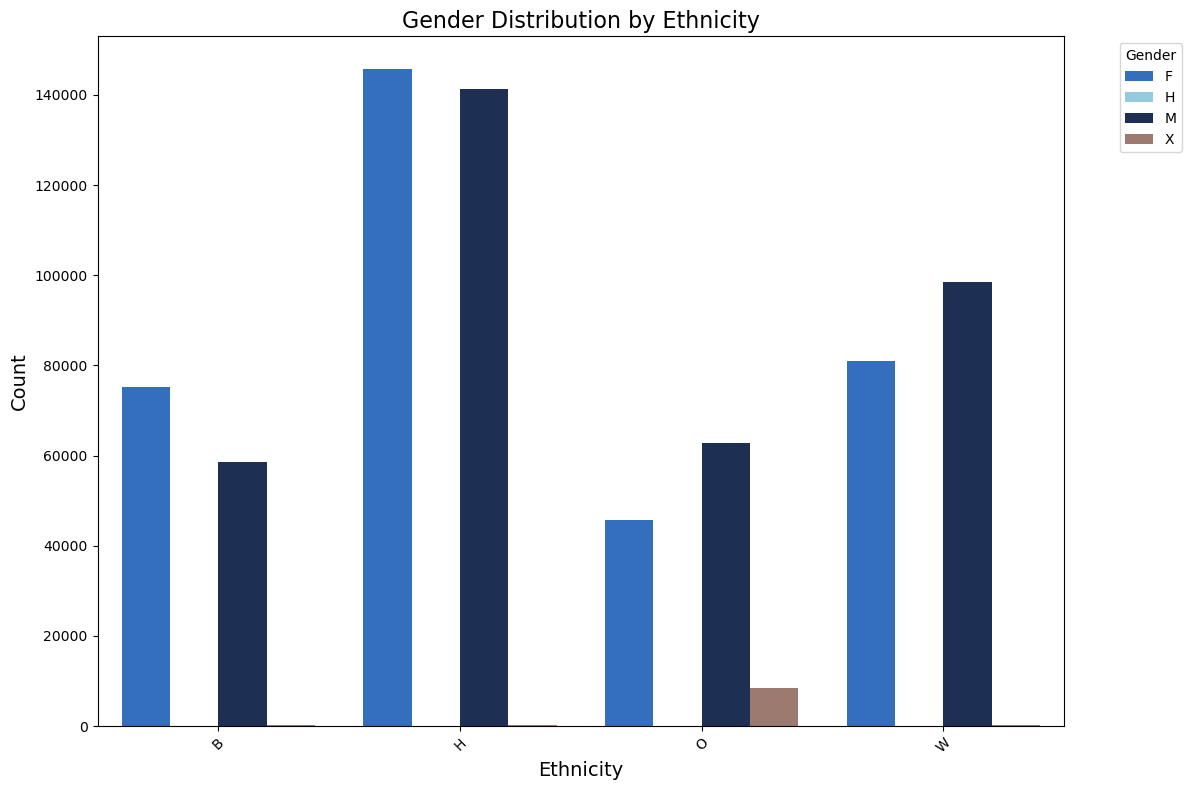

In [71]:
victim_data = df[['Vict Descent', 'Crime Category', 'AREA NAME', 'Vict Age', 'Year', 'Vict Sex']]

gender_ethnicity = victim_data.groupby(['Vict Sex', 'Vict Descent']).size().reset_index(name='Count')

plt.figure(figsize=(12, 8))
sns.barplot(data=gender_ethnicity, x='Vict Descent', y='Count', hue='Vict Sex', palette=[Color_palette[0],Color_palette[1],Color_palette[2],Color_palette[3]])
plt.title('Gender Distribution by Ethnicity', fontsize=16)
plt.xlabel('Ethnicity', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Gender', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<p>
ניתן לראות מהרגף שאכן קיימים פערים בכמות הנפגעים בין גברים לנשים בצורה יותר מובהקת מאשר מה שראינו באותו פילוח שבוצע על כלל האוכולוסיה 
</p>

<h2>איזה סוג פשע הכי נפוץ</h2>

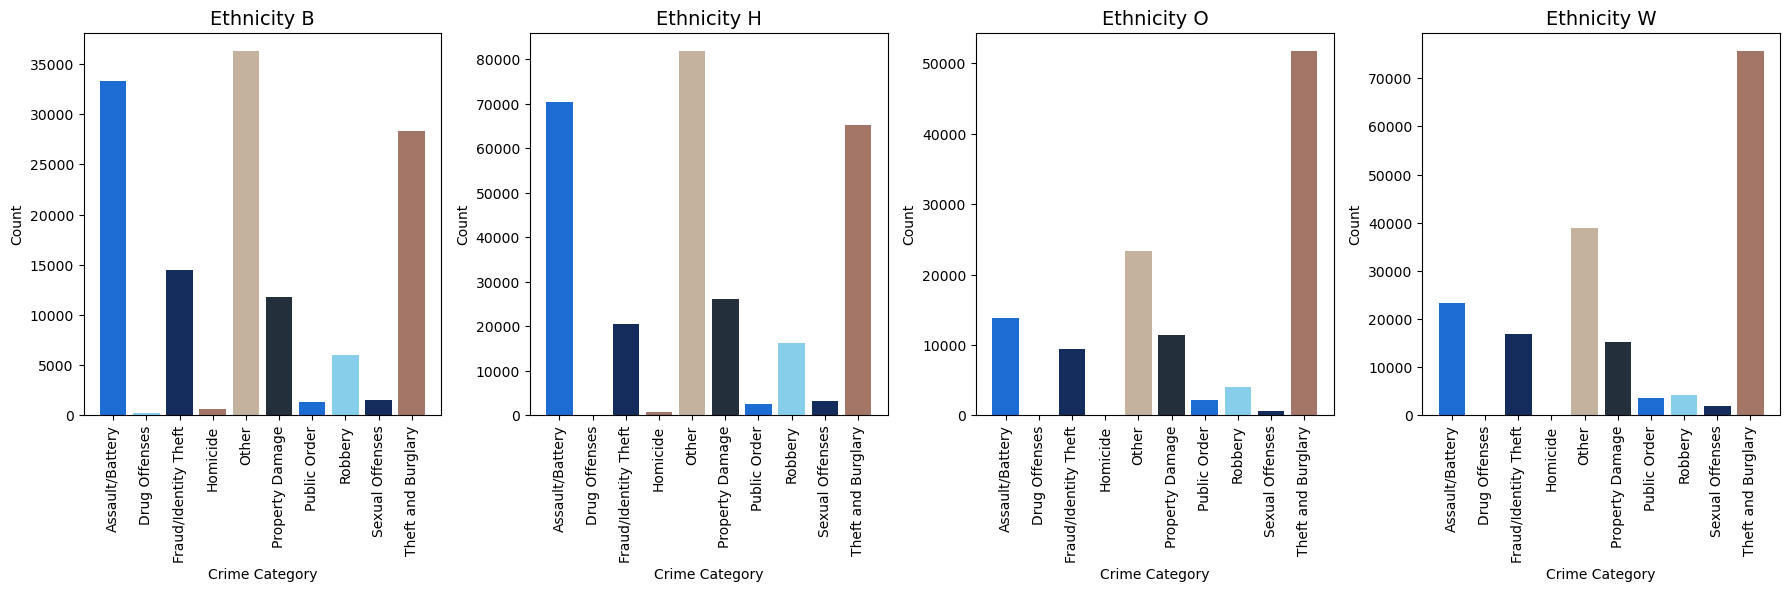

In [74]:

crime_by_ethnicity = victim_data.groupby(['Vict Descent', 'Crime Category']).size().reset_index(name='Count')
top_ethnicities = crime_by_ethnicity.groupby('Vict Descent')['Count'].sum().nlargest(7).index
filtered_crime_by_ethnicity = crime_by_ethnicity[crime_by_ethnicity['Vict Descent'].isin(top_ethnicities)]

num_ethnicities = 4
rows, cols = 2, 4  
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))  
axes = axes.flatten()  

unique_ethnicities = filtered_crime_by_ethnicity['Vict Descent'].unique()
for idx, ethnicity in enumerate(unique_ethnicities[:num_ethnicities]):
    ethnicity_data = filtered_crime_by_ethnicity[filtered_crime_by_ethnicity['Vict Descent'] == ethnicity]
    
    axes[idx].bar(ethnicity_data['Crime Category'], ethnicity_data['Count'], color=Color_palette)
    axes[idx].set_title(f'Ethnicity {ethnicity}', fontsize=14)
    axes[idx].set_xlabel('Crime Category', fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=90)

for i in range(len(unique_ethnicities), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()

<p>

<b>מסקנה כללית:</b>
הקבוצות ההיספניות והשחורות נפגעות בעיקר ממקרי תקיפה, עם נשים כנפגעות עיקריות, בעוד שלבנים ושאר הקבוצות נפגעות בעיקר מגניבה ופריצה, עם גברים כנפגעים העיקריים.
    
</p>

<h1 id="sect4"> חלק שלישי - ניתוח לפי איזורים </h1>

<h2>בחרנו את חמשת האזורים בעלי רמת הפשיעה הגבוהה ביותר וניתחנו את הגיל הנפוץ ביותר</h2>
<img src="https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/annotated_los_angeles_map.jpg">

In [78]:
top5areas = df['AREA NAME'].value_counts().head(5).index
top5areas_df = df[df['AREA NAME'].isin(top5areas)].reset_index(drop=True)
top5areas_df

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,...,LOCATION,Year,Month,Day,Hour,Day of Week,Vict Age Cat,Day_Part,Time Period,Crime Category
0,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),...,1000 S FLOWER ST,2020,2,9,18,Saturday,Middle,Evening,Daytime,Theft and Burglary
1,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,1400 W 37TH ST,2020,11,11,17,Wednesday,Teen,Afternoon,Daytime,Theft and Burglary
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,SIDEWALK,...,1900 TRANSIENT,2022,8,18,12,Monday,Adult,Afternoon,Daytime,Fraud/Identity Theft
3,230110144,2023-04-04,2020-07-03,900,Central,THEFT OF IDENTITY,25,M,H,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,1100 S GRAND AV,2023,4,4,9,Friday,Adult,Morning,Daytime,Fraud/Identity Theft
4,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,CELL PHONE STORE,...,2500 S SYCAMORE AV,2022,7,22,11,Tuesday,Adult,Morning,Daytime,Fraud/Identity Theft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220933,231218219,2023-08-19,2023-08-18,1700,77th Street,BURGLARY,22,X,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,4600 S VERMONT AV,2023,8,19,17,Friday,Adult,Afternoon,Daytime,Theft and Burglary
220934,231418609,2023-10-11,2023-10-11,1600,Pacific,THEFT PLAIN - PETTY ($950 & UNDER),51,M,H,STREET,...,6400 WYNKOOP ST,2023,10,11,16,Wednesday,Middle,Afternoon,Daytime,Theft and Burglary
220935,231209503,2023-04-03,2023-04-02,2300,77th Street,ROBBERY,52,M,H,SIDEWALK,...,8300 S BROADWAY,2023,4,3,23,Sunday,Middle,Night,Nighttime,Robbery
220936,230311382,2023-05-25,2023-05-25,1700,Southwest,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",41,M,H,"VEHICLE, PASSENGER/TRUCK",...,4200 HALLDALE AV,2023,5,25,17,Thursday,Middle,Afternoon,Daytime,Property Damage


Text(0.5, 1.0, 'Number of Crime Incidents over Victim Ages')

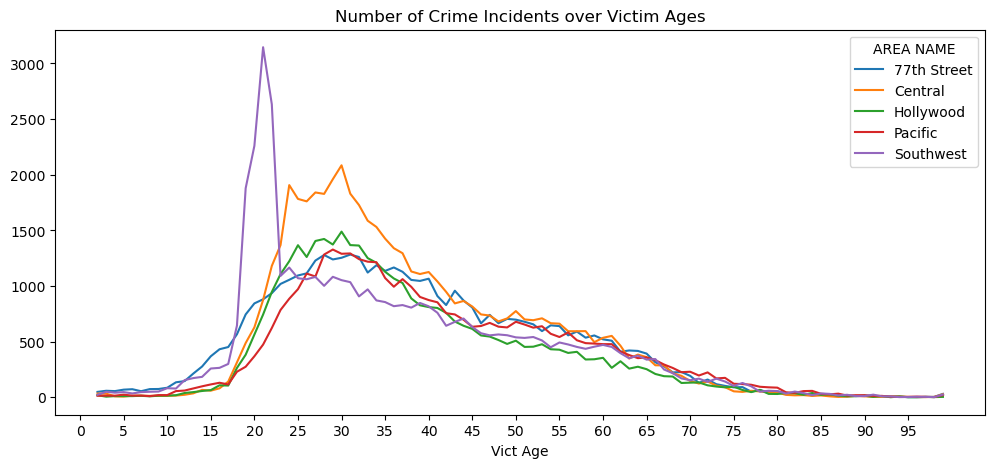

In [79]:
plt_data = top5areas_df.groupby(['Vict Age', 'AREA NAME'])['Day'].count().unstack()
plt_data.plot(kind='line', figsize=(12, 5), xticks=range(0, 100, 5))
plt.title('Number of Crime Incidents over Victim Ages')

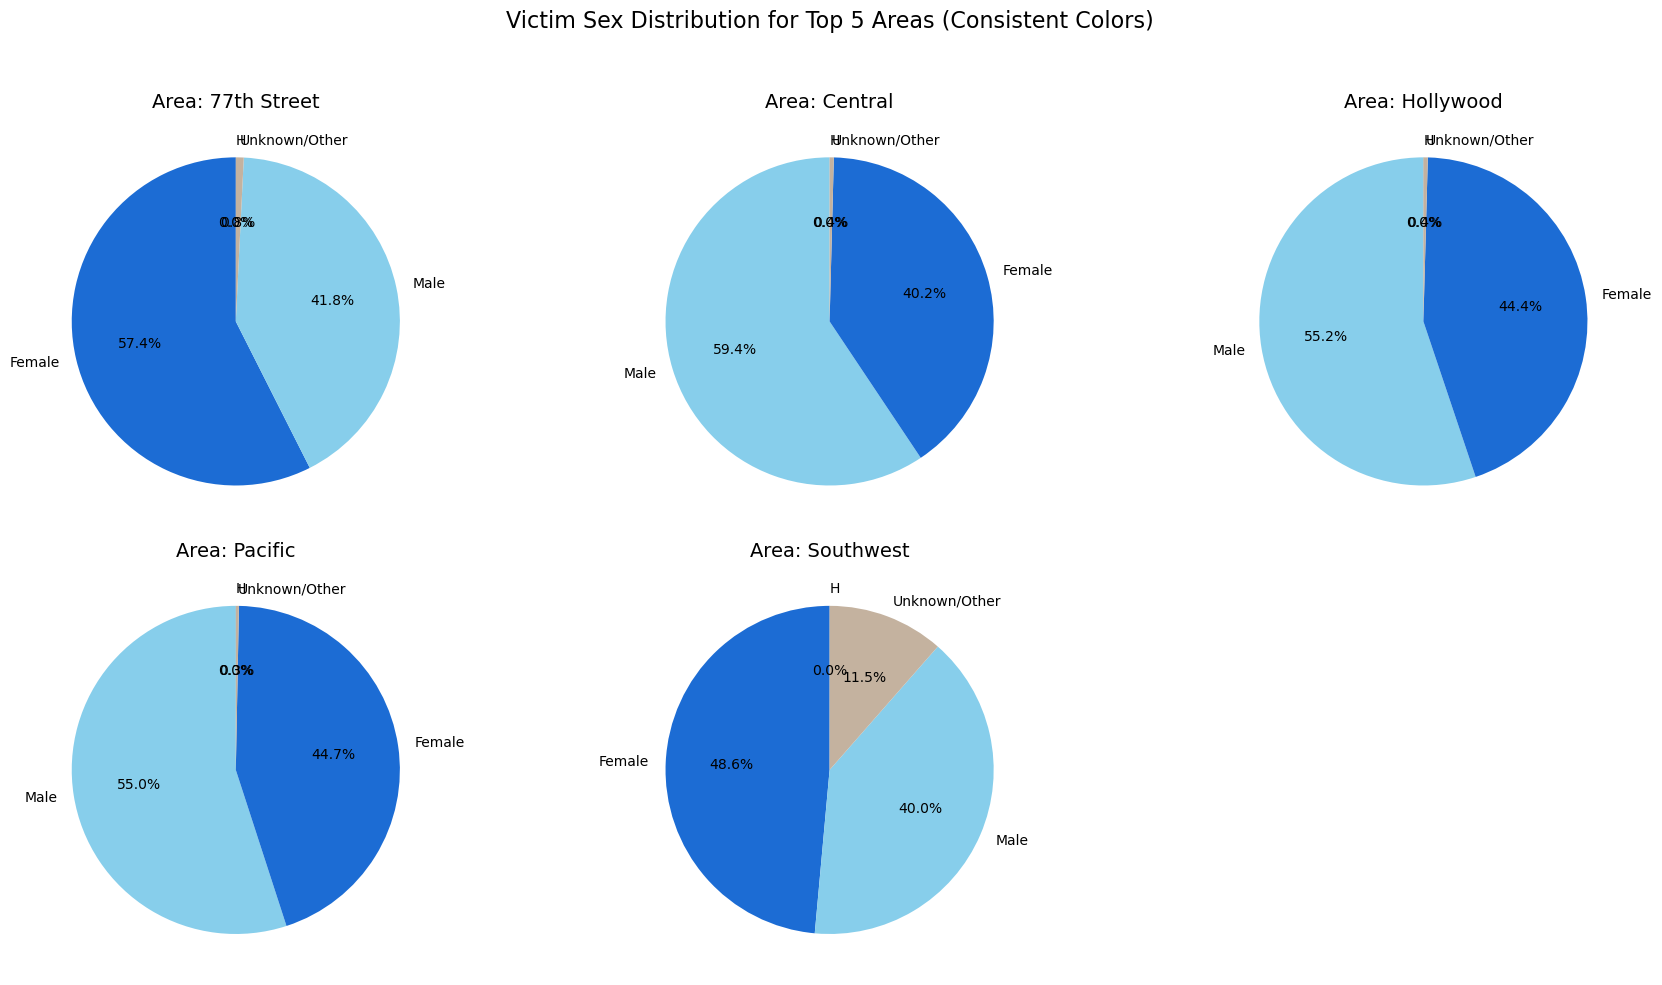

In [80]:
top5areas = data['AREA NAME'].value_counts().head(5).index
top5areas_df = data[data['AREA NAME'].isin(top5areas)].reset_index(drop=True)
plt_data = (top5areas_df.groupby(['AREA NAME', 'Vict Sex'])['Vict Age'].count().reset_index(name='Count').sort_values(by=['AREA NAME', 'Count'], ascending=[True, False]))

unique_sexes = plt_data['Vict Sex'].unique()
color_mapping = {'F': '#1c6cd4', 'M': 'skyblue','X': '#c4b29f','H': '#232f3a',}

areas = plt_data['AREA NAME'].unique()
rows, cols = (len(areas) // 3) + 1, 3 
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))
axes = axes.flatten()

for idx, area in enumerate(areas):
    subset = plt_data[plt_data['AREA NAME'] == area]
    colors = [color_mapping[sex] for sex in subset['Vict Sex']]
    axes[idx].pie(subset['Count'],labels=subset['Vict Sex'].map({'F': 'Female', 'M': 'Male', 'X': 'Unknown/Other', 'H': 'H'}),autopct='%1.1f%%',startangle=90,colors=colors,)
    axes[idx].set_title(f'Area: {area}', fontsize=14)


for i in range(len(areas), len(axes)):
    fig.delaxes(axes[i])

plt.suptitle('Victim Sex Distribution for Top 5 Areas (Consistent Colors)', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

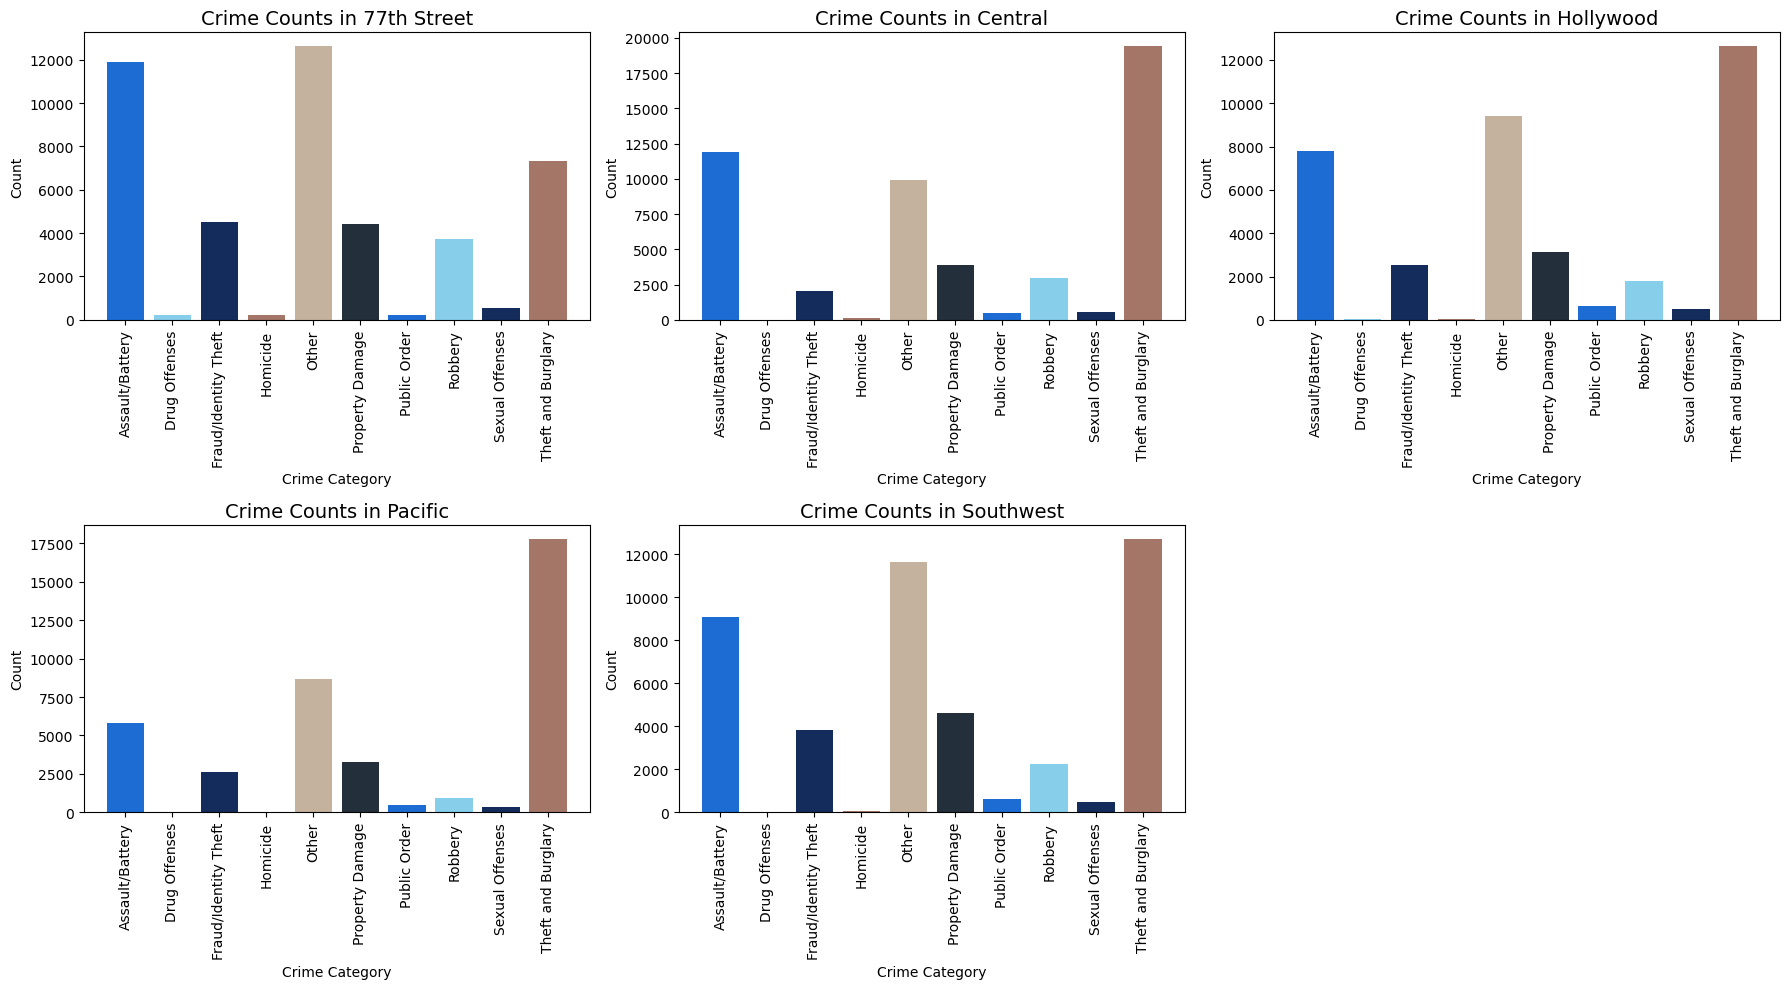

In [81]:
area_groups = top5areas_df.groupby(['AREA NAME', 'Crime Category']).size().reset_index(name='Count')

num_areas = 5
rows, cols = 2, 3  
fig, axes = plt.subplots(rows, cols, figsize=(18, 10))  
axes = axes.flatten()  
unique_areas = area_groups['AREA NAME'].unique()
for idx, area in enumerate(unique_areas[:num_areas]):  
    area_data = area_groups[area_groups['AREA NAME'] == area]
    axes[idx].bar(area_data['Crime Category'], area_data['Count'], color=Color_palette)
    axes[idx].set_title(f'Crime Counts in {area}', fontsize=14)
    axes[idx].set_xlabel('Crime Category', fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].tick_params(axis='x', rotation=90)

for i in range(len(unique_areas), len(axes)):
    fig.delaxes(axes[i])  

plt.tight_layout()
plt.show()

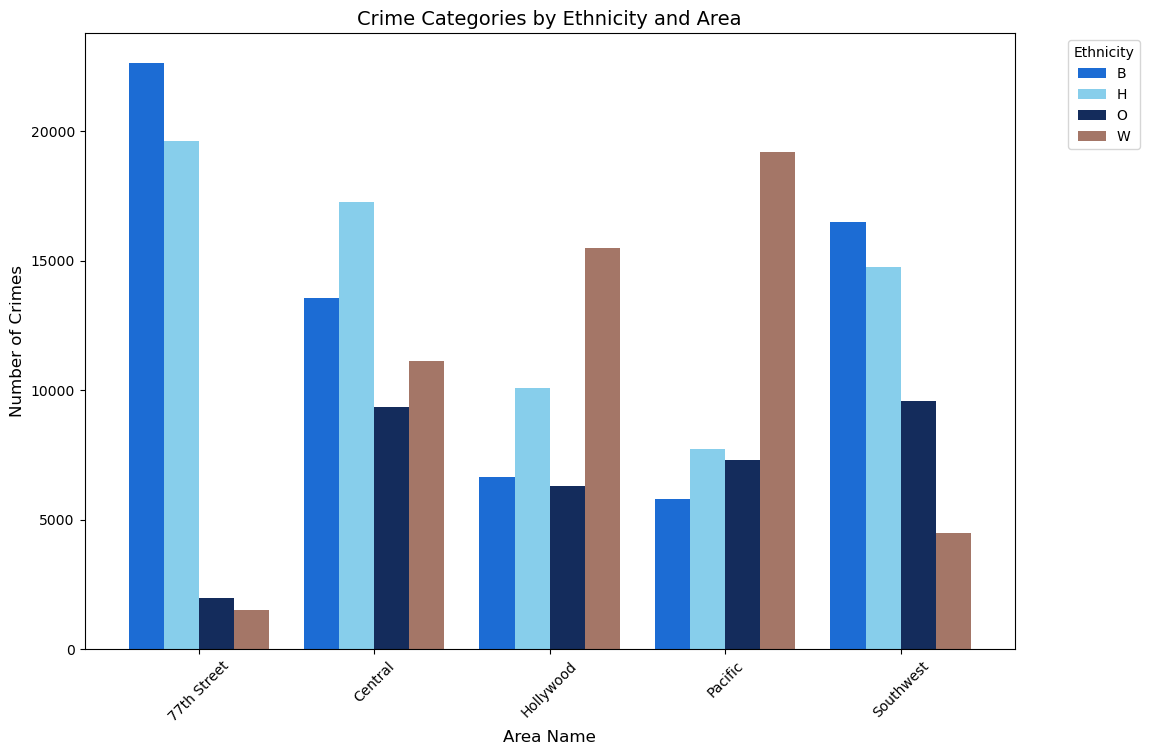

In [82]:
crime_ethnicity_df = top5areas_df.groupby(['AREA NAME', 'Vict Descent']).size().unstack(fill_value=0)
# יצירת גרף עמודות
crime_ethnicity_df.plot(kind='bar', figsize=(12, 8), stacked=False, width=0.8, color=Color_palette)
# כותרות
plt.title('Crime Categories by Ethnicity and Area', fontsize=14)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
# הצגת הגרף
plt.xticks(rotation=45)
plt.legend(title='Ethnicity', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<p>
<b>מסקנה כללית:</b>
הפשעים הנפוצים ביותר משתנים בין האזורים, כאשר ברחוב 77 הפשע הנפוץ ביותר הוא תקיפה, ובשאר האזורים גניבה ופריצה. קבוצות אתניות שונות נפגעות בצורה שונה בכל אזור, כאשר באופן כללי השחורים וההיספניים נפגעים יותר מתקיפה, והלבנים וההיספניים נפגעים יותר מגניבה ופריצהגיל הנפגע ביותר הוא בין 28-29 והמין הנפגע הוא גברים
</p>

<h1 id="sect5"> חלק רביעי - פשעים עיקריים</h1>

<h2>
    יצרנו מפת חום על מנת לבדוק מהם הפשעים הנפוצים ביותר לפי האזורים שבחרנו
</h2>

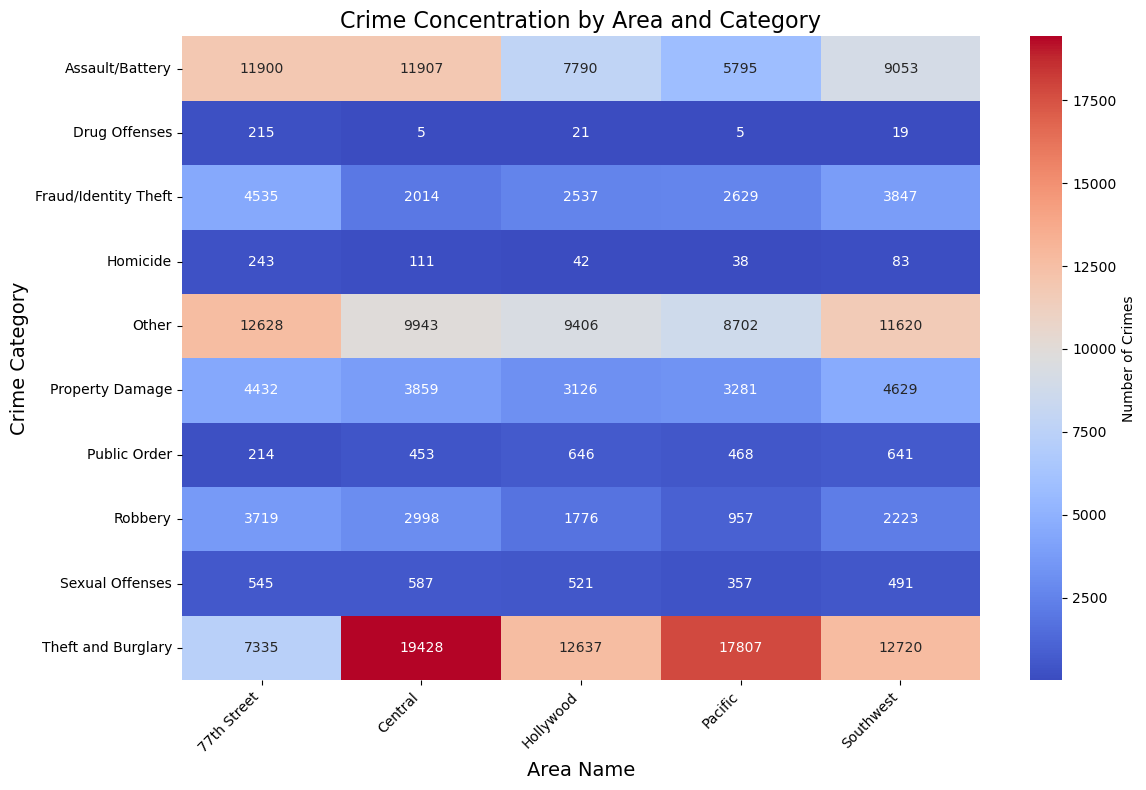

In [86]:
# Filtering top 5 areas
top_areas = top5areas_df['AREA NAME'].value_counts().head(5).index
df_top_areas = top5areas_df[top5areas_df['AREA NAME'].isin(top_areas)]

# Preparing data for heatmap
heatmap_data = df_top_areas.pivot_table(index='Crime Category',columns='AREA NAME',aggfunc='size',fill_value=0             )

# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="coolwarm", cbar_kws={'label': 'Number of Crimes'})
plt.title('Crime Concentration by Area and Category', fontsize=16)
plt.xlabel('Area Name', fontsize=14)
plt.ylabel('Crime Category', fontsize=14)
plt.xticks(rotation=45, ha='right')  # Adjust text on X-axis
plt.tight_layout()
plt.show()

<p>
    יצרנו גרף קווי של שני הפשעים העיקריים כדי לראות את ההתפלגות בצורה יותר ברורה
</p>

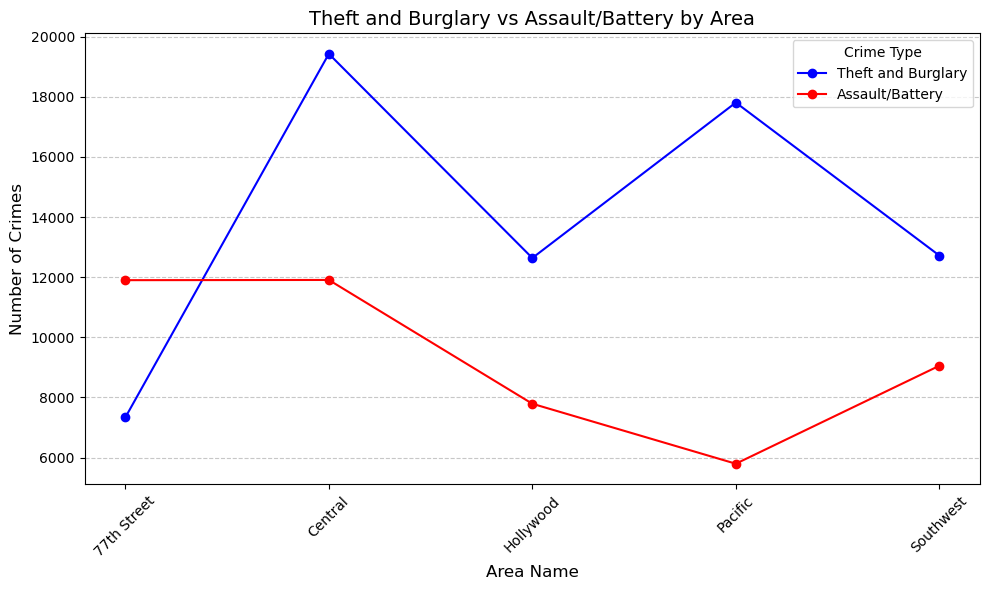

In [88]:
# Filtering for specific crime categories
selected_crimes = top5areas_df[top5areas_df['Crime Category'].isin(['Theft and Burglary', 'Assault/Battery'])]
top_areas = top5areas_df['AREA NAME'].value_counts().head(5).index
selected_crimes_top = selected_crimes[selected_crimes['AREA NAME'].isin(top_areas)]
crime_counts = selected_crimes_top.groupby(['AREA NAME', 'Crime Category']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 6))
plt.plot(crime_counts.index, crime_counts['Theft and Burglary'], marker='o', label='Theft and Burglary', color='blue')
plt.plot(crime_counts.index, crime_counts['Assault/Battery'], marker='o', label='Assault/Battery', color='red')
plt.title('Theft and Burglary vs Assault/Battery by Area', fontsize=14)
plt.xlabel('Area Name', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.legend(title='Crime Type', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)


# Displaying the graph
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

הפשעים הנפוצים ביותר בכל אזור משתנים: ברחוב 77 תקיפה נפוצה, בעוד שבשאר האזורים גניבה ופריצה נפוצה יותר.

In [90]:
selected_crimes.reset_index(drop=True, inplace=True) 
selected_crimes

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Premis Desc,...,LOCATION,Year,Month,Day,Hour,Day of Week,Vict Age Cat,Day_Part,Time Period,Crime Category
0,200106753,2020-02-09,2020-02-08,1800,Central,BURGLARY FROM VEHICLE,47,M,O,BUS STOP/LAYOVER (ALSO QUERY 124),...,1000 S FLOWER ST,2020,2,9,18,Saturday,Middle,Evening,Daytime,Theft and Burglary
1,200320258,2020-11-11,2020-11-04,1700,Southwest,BIKE - STOLEN,19,X,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,1400 W 37TH ST,2020,11,11,17,Wednesday,Teen,Afternoon,Daytime,Theft and Burglary
2,211404152,2021-01-04,2020-12-28,1600,Pacific,BURGLARY,44,F,H,PUBLIC STORAGE,...,12600 W JEFFERSON BL,2021,1,4,16,Monday,Middle,Afternoon,Daytime,Theft and Burglary
3,220316688,2022-09-12,2020-09-11,2100,Southwest,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,27,F,O,STREET,...,1300 W 37TH DR,2022,9,12,21,Friday,Adult,Evening,Nighttime,Theft and Burglary
4,230118041,2023-08-16,2020-08-27,2100,Central,INTIMATE PARTNER - AGGRAVATED ASSAULT,59,F,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,800 W 1ST ST,2023,8,16,21,Thursday,Middle,Evening,Nighttime,Assault/Battery
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116367,230604725,2023-01-18,2023-01-18,1,Hollywood,BATTERY - SIMPLE ASSAULT,32,F,B,OTHER BUSINESS,...,7000 HOLLYWOOD BL,2023,1,18,0,Wednesday,Adult,Night,Nighttime,Assault/Battery
116368,230109273,2023-03-23,2023-03-11,940,Central,THEFT FROM MOTOR VEHICLE - GRAND ($950.01 AND ...,34,M,O,PARKING LOT,...,800 S FLOWER ST,2023,3,23,9,Saturday,Adult,Morning,Daytime,Theft and Burglary
116369,231218219,2023-08-19,2023-08-18,1700,77th Street,BURGLARY,22,X,O,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",...,4600 S VERMONT AV,2023,8,19,17,Friday,Adult,Afternoon,Daytime,Theft and Burglary
116370,231418609,2023-10-11,2023-10-11,1600,Pacific,THEFT PLAIN - PETTY ($950 & UNDER),51,M,H,STREET,...,6400 WYNKOOP ST,2023,10,11,16,Wednesday,Middle,Afternoon,Daytime,Theft and Burglary


In [91]:
filtered_df= selected_crimes.copy()
filtered_df['DATE OCC'] = pd.to_datetime(filtered_df['DATE OCC'], errors='coerce')
filtered_df['Day of Week'] = filtered_df['DATE OCC'].dt.day_name()
filtered_df['Day of Week'] = pd.Categorical(filtered_df['Day of Week'],categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ordered=True)
time_analysis_week = filtered_df.groupby(['Day of Week', 'Crime Category', 'AREA NAME'], observed=True).size().reset_index(name='Count')
time_analysis_week = time_analysis_week.sort_values(by='Day of Week')

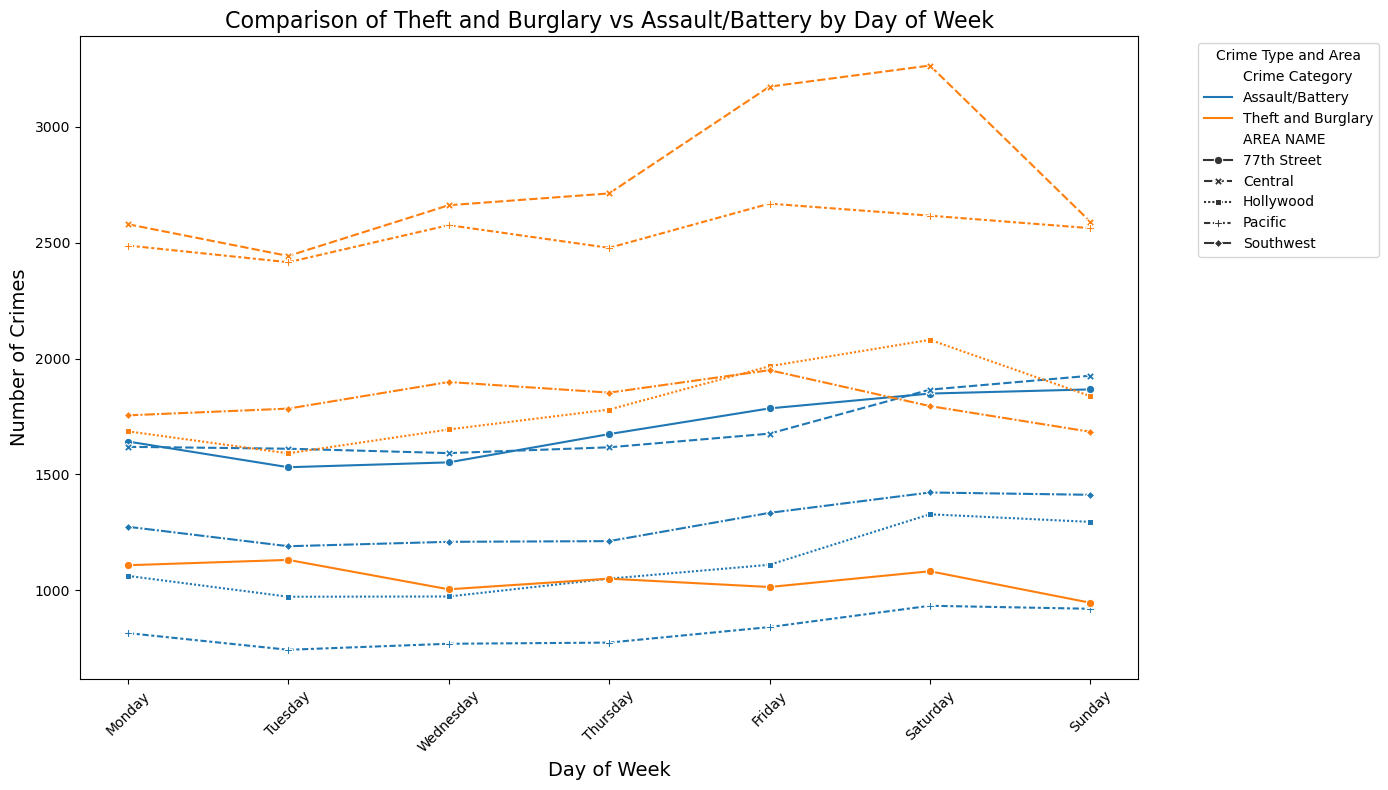

In [92]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=time_analysis_week, x='Day of Week', y='Count', hue='Crime Category', style='AREA NAME', markers=True)

plt.title('Comparison of Theft and Burglary vs Assault/Battery by Day of Week', fontsize=16)
plt.xlabel('Day of Week', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Crime Type and Area', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


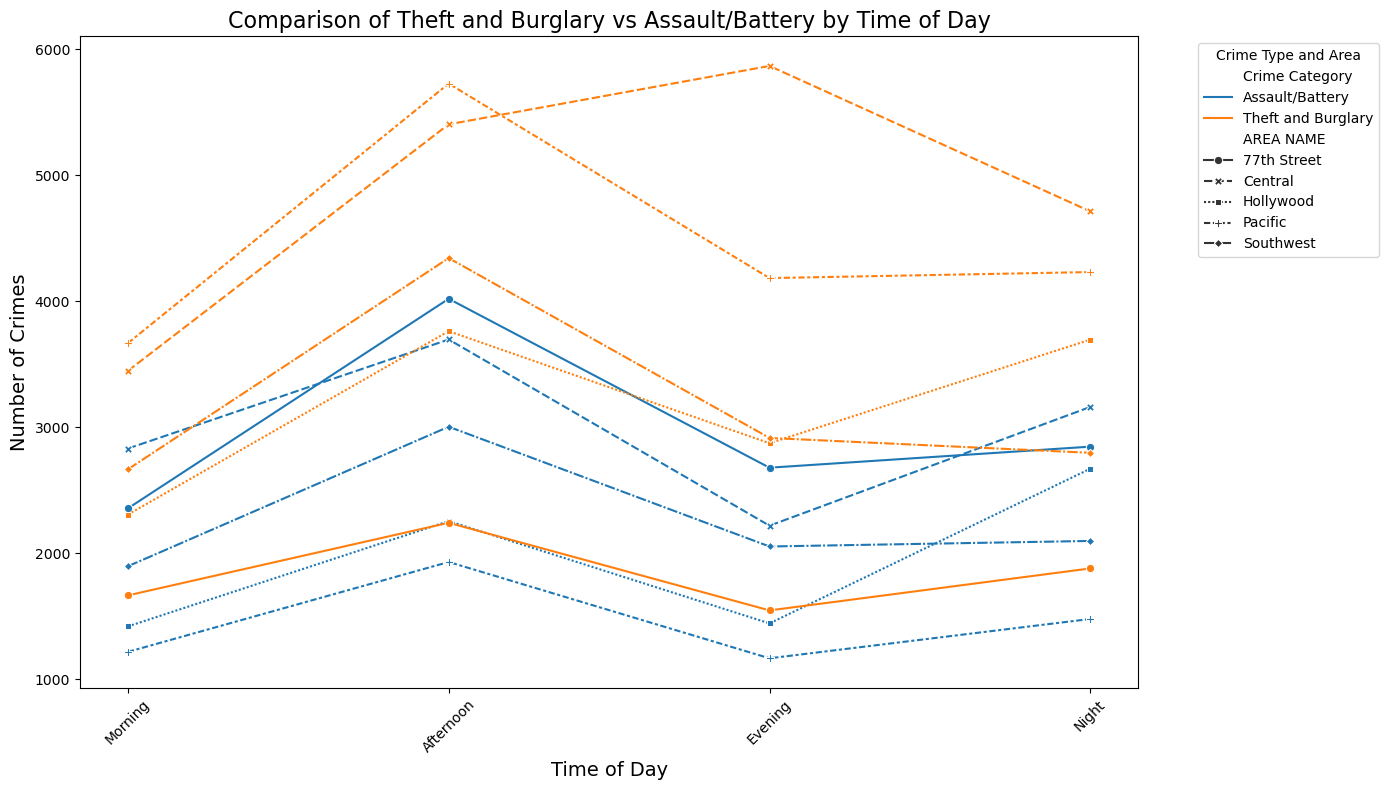

In [93]:
filtered_df['Day_Part'] = pd.Categorical(filtered_df['Day_Part'], categories=['Morning', 'Afternoon', 'Evening', 'Night'], ordered=True)

time_analysis = filtered_df.groupby(['Day_Part', 'Crime Category', 'AREA NAME'], observed=True).size().reset_index(name='Count')
time_analysis = time_analysis.sort_values(by='Day_Part')
plt.figure(figsize=(14, 8))
sns.lineplot(data=time_analysis, x='Day_Part', y='Count', hue='Crime Category', style='AREA NAME', markers=True)

plt.title('Comparison of Theft and Burglary vs Assault/Battery by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Crime Type and Area', fontsize=10, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()


במהלך השבוע, רמת הפשיעה עולה בסופי שבוע ויורדת בתחילתו, ובמהלך היום יש עלייה בצהריים וירידה בערב, פרט לרחוב סנטרל שבו רמת הפשיעה ממשיכה לעלות בערב.

In [95]:
areas = filtered_df['AREA NAME'].value_counts().head(5).index
areas_df = filtered_df[filtered_df['AREA NAME'].isin(areas)].reset_index(drop=True)
areas_df[['AREA NAME', 'Vict Sex', 'Vict Age']]

,AREA NAME,Vict Sex,Vict Age
0,Central,M,47
1,Southwest,X,19
2,Pacific,F,44
3,Southwest,F,27
4,Central,F,59
...,...,...,...
116367,Hollywood,F,32
116368,Central,M,34
116369,77th Street,X,22
116370,Pacific,M,51


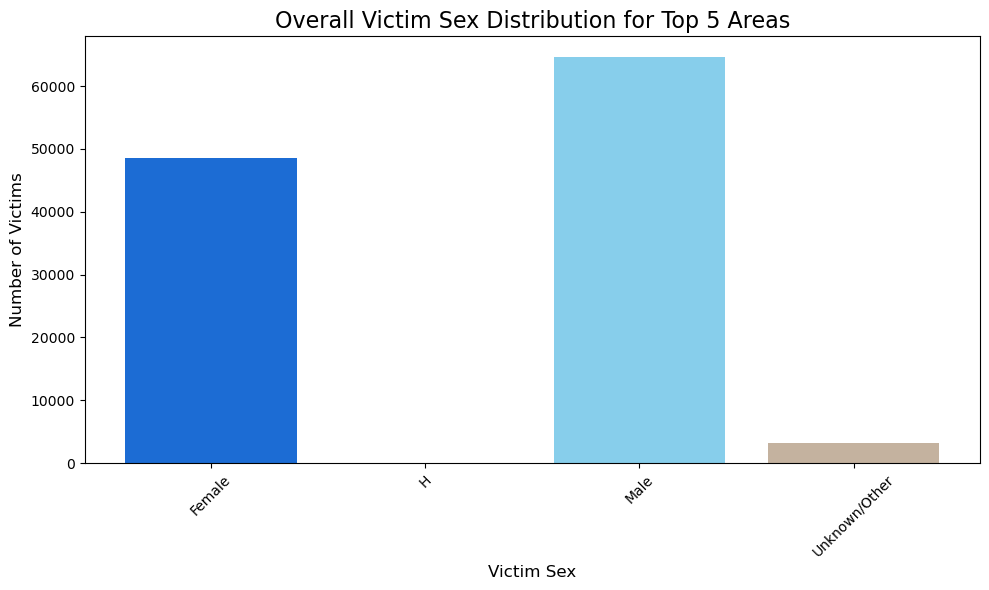

In [96]:
areas = filtered_df['AREA NAME'].value_counts().head(5).index
areas_df = filtered_df[filtered_df['AREA NAME'].isin(areas)].reset_index(drop=True)
plt_data = (areas_df.groupby(['AREA NAME', 'Vict Sex'])['Vict Age'].count().reset_index(name='Count').sort_values(by=['AREA NAME', 'Count'], ascending=[True, False]))
color_mapping = {'F': '#1c6cd4', 'M': 'skyblue', 'X': '#c4b29f', 'H': '#232f3a'}

aggregated_data = plt_data.groupby('Vict Sex')['Count'].sum().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(aggregated_data['Vict Sex'].map({'F': 'Female', 'M': 'Male', 'X': 'Unknown/Other', 'H': 'H'}),aggregated_data['Count'],color=[color_mapping[sex] for sex in aggregated_data['Vict Sex']])
plt.title('Overall Victim Sex Distribution for Top 5 Areas', fontsize=16)
plt.xlabel('Victim Sex', fontsize=12)
plt.ylabel('Number of Victims', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


</body>

<b>מסקנה מרכזית:</b>
 שני סוגי הפשעים העיקריים הם תקיפה וגניבה ופריצה, כאשר הגברים הם הקבוצה הנפגעת ביותר בכל אחד מהם. בנוסף, נרשמה עלייה ברמת הפשיעה בסוף השבוע ובמהלך היום, עם מגמה דומה בכל האזורים, פרט לרחוב סנטרל שבו הפשיעה המשיכה לעלות גם בשעות הערב.

<h1 id="sect6">סיכום</h1>

<img src="https://raw.githubusercontent.com/oree334/DataAnalysisAcademicProject/refs/heads/master/WhatsApp%20Image%202025-01-15%20at%2016.14.09_a7a92c84.jpg">


<p>
הנתונים שהתקבלו מהניתוחים שביצענו מצביעים על מגמות שונות לפי אזורים, גיל ומין, אך יש צורך בחקירה מעמיקה יותר כדי להבין את הקשר בין הפשעים, קבוצות אתניות ונתוני גיל ומגדר. תובנות אלו עשויות לשמש כבסיס לכיווני חקירה נוספים, אשר יביאו להבנה רחבה ומעמיקה יותר של דפוסי הפשיעה.
</p>